<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Does Rainy Weather Increase Healthcare Cases?

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Data

The following datasets are used in the analysis:

1. 2012 to 2021 Infectious disease statistics: Contains the average daily number of acute upper respiratory infections (flu cases are not reported by MOH, as such, this is used as a substitute) and weekly count of dengue cases.

    *Disclaimer: The data from 2012 to 2021 were provided in multiple excel files and sheets. To facilitate the data cleaning and enable reuse of the defined function for cleaning, the following changes were performed on the excel files directly:*
     - The individual sheets were saved into seperate csv files.
     - The columns for Acute Upper Respiratory Infections and Dengue were given an inconsistent naming convention. This was standardized within the csv files manually.  

2. Road accidents (2008-2021): Contains the monthly number of road accidents that resulted in fatalities for injuries

3. Number of rainy days per month (1982 - 2022): Contains the monthly number of rainy days in Singapore

4. Monthly total rain recorded (1982 - 2022): Contains the monthly number of total rainfall in Singapore

5. Relative Humidity: Contains the monthly mean relative humidity in Singapore

6. Sunshine Duration Hours: Contains the monthly mean daily hours of sunshine in Singapore

7. Surface Air Temperature: Contains thh monthly mean surface air temperature in Singapore
    

## Problem Statement

**Problem Statement:** 
There is a general consensus that during rainy seasons, people tend to fall sick more (e.g. flu). Furthermore, the wet environment could increase the likelyhood of road accidents and create an environment for mosquitoes to breed, resulting in an increase in dengue cases. If the above statement is true, analyzing the climate data in Singapore would allow healthcare professionals to identify peak periods where more staff and other resources such as hospital bed and medication would be needed. Advertising campaigns to get a flu jab can be made timely as well information campaigns to remind residents to ensure there are no mosquito breeding grounds formed. 

### Outside Research

According to Dr Lim Chien Wei (cluster head of Healthway Medical Group), the flu season in 2017 was extended due to the rainy weather. The rational given was that the cold weather allows for virus to survive longer. Evidence given was that flu cases in January 2018 was 3,158, compared to the previous year which had 2,836 cases (11% increase)

Source: [Straits Times, 16 Jan 2018](https://www.straitstimes.com/singapore/health/rainy-weather-may-have-extended-the-year-end-flu-season)

Evidence has also been presented in Singapore's parliament that rainy weather contributes to the faster replication of the dengue virus as well as increasing mosquito breeding habitats. 

Source: [Ministry of Sustainability and the Environment, 2 Aug 2022](https://www.mse.gov.sg/resource-room/category/2022-08-02-written-reply-to-pq-on-causes-for-rise-in-dengue-cases/)

According to the US Department of Transportation, approximately 21% of vehicle crashes are weather related. The majority of the weather related crashes involve wet pavements and during rainfall. Hence, this supports the theory that rainy weather could increase the number of road accidents. 

Source: [US Department of Transportation](https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm)


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def count_mean(nums):
    sum = 0
    for num in nums:
        sum += num
    mean = sum / len(nums)
    return mean

In [2]:
list_of_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
count_mean(list_of_numbers)

5.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def count_std(nums):
    mean = count_mean(nums)
    
    # calculate (x minus mean) squared for all x
    sum_x_mean_squared = 0
    for num in nums:
        x_mean = num - mean
        sum_x_mean_squared += x_mean**2
    std = (sum_x_mean_squared/len(nums))**0.5
    return std 

In [4]:
list_of_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
count_std(list_of_numbers)

2.581988897471611

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [7]:
pd.options.display.max_columns = None

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

#### Data Import

In [8]:
# Number of flu and dengue cases per month in 2022
infections_2022 = pd.read_csv('../data/2022 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2021
infections_2021 = pd.read_csv('../data/2021 weekly-infectious-bulletin_cases.csv')
# Number of flu and dengue cases per month in 2020
infections_2020 = pd.read_csv('../data/2020 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2019
infections_2019 = pd.read_csv('../data/2019 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2018
infections_2018 = pd.read_csv('../data/2018 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2017
infections_2017 = pd.read_csv('../data/2017 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2016
infections_2016 = pd.read_csv('../data/2016 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2015
infections_2015 = pd.read_csv('../data/2015 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2014
infections_2014 = pd.read_csv('../data/2014 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2013
infections_2013 = pd.read_csv('../data/2013 weekly-infectious-bulletin_cases.csv', header=1)
# Number of flu and dengue cases per month in 2012
infections_2012 = pd.read_csv('../data/2012 weekly-infectious-bulletin_cases.csv', header=1)
# Number of accidents with injuries and fatalities per month from 2008 to 2021
accidents = pd.read_csv('../data/road-accidents.csv')
# Monthly rainfall from 1982 to 2022
rainfall = pd.read_csv('../data/rainfall-monthly-total.csv')
# Number of rainy days per month from 1982 to 2022
rainy_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
# Monthly relative humidity from 1982 to 2022
humidity = pd.read_csv('../data/relative-humidity-monthly-mean.csv')
# Monthly mean sunshine hours
sunshine = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv')
# Monthly surface air temperature
temperature = pd.read_csv('../data/surface-air-temperature-monthly-mean-daily-minimum.csv')

#### Function definitions for cleaning

In [9]:
# Function used to clean the dates for infections between 2012 to 2021
def convert_week_to_month_year(weekly_data):
    
    # Convert the month_year column to dateTime format
    weekly_data['date'] = pd.to_datetime(weekly_data['date'], dayfirst=True)
   
    # Create year column
    weekly_data['year'] = weekly_data['date'].dt.year
    
    # If first index date is the previous year, change to the current year
    if weekly_data['year'][0] < weekly_data['year'][1]:
        weekly_data['year'][0] = weekly_data['year'][1]
    
    # Create month column
    weekly_data['month'] = weekly_data['date'].dt.month
    
    return weekly_data

In [10]:
# Function used to clean the dates for infections in 2022
# 2022 requires a different function due to the data having a different date format
def convert_week_to_month_year_2022(weekly_data):
    # Slice the weekly range from dd/mm/yyyy - dd/mm/yyyy format to just the
    # first date in the range (dd/mm/yyyy)
    weekly_data['month_year'] = weekly_data['date'].str.split(pat='-')
    for week in range(len(weekly_data['month_year'])):
        weekly_data['month_year'][week] = weekly_data['month_year'][week][0] 
    
    # Convert the month_year column to dateTime format
    weekly_data['month_year'] = pd.to_datetime(weekly_data['month_year'], dayfirst=True)
       
    # Create year column
    weekly_data['year'] = weekly_data['month_year'].dt.year
    
    # If first index date is the previous year, change to the current year
    if weekly_data['year'][0] < weekly_data['year'][1]:
        weekly_data['year'][0] = weekly_data['year'][1]
    
    # Create month column
    weekly_data['month'] = weekly_data['month_year'].dt.month
    
    return weekly_data

#### Clean Infections 2022 Data

In [11]:
infections_2022.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Cholera,Paratyphoid,Typhoid,Acute Viral Hepatitis A,Acute Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue,DHF,Malaria,Chikungunya,HFMD,Diphtheria,Measles,Monkeypox,Mumps,Rubella,SARS,Nipah,Acute Viral hepatitis B,Legionellosis,Campylobacter enteritis,Acute Viral hepatitis C,Leptospirosis,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Zika,Ebola Virus Disease,Japanese Encephalitis,Tetanus,Botulism,Murine Typhus,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,2/1/2022 - 8/1/2022,NaN,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,106.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,977.0,38.0,297.0,3.0
1,2,9/1/2022 - 15/1/2022,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,146.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1263.0,43.0,330.0,2.0
2,3,16/1/2022 - 22/1/2022,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,178.0,2.0,0.0,0.0,48.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,13.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1567.0,44.0,316.0,2.0
3,4,23/1/2022 - 29/1/2022,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,169.0,2.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1911.0,41.0,317.0,1.0
4,5,30/1/2022 - 5/2/2022,NaN,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,153.0,1.0,1.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2945.0,47.0,363.0,4.0


In [12]:
# Rename the columns we need
infections_2022.rename(columns={'Unnamed: 1' : 'date', 
                        'Dengue' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2022 = infections_2022[['date', 'dengue', 'flu']]
infections_2022.head()

,date,dengue,flu
0,2/1/2022 - 8/1/2022,106.0,977.0
1,9/1/2022 - 15/1/2022,146.0,1263.0
2,16/1/2022 - 22/1/2022,178.0,1567.0
3,23/1/2022 - 29/1/2022,169.0,1911.0
4,30/1/2022 - 5/2/2022,153.0,2945.0


In [13]:
infections_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    52 non-null     object 
 1   dengue  48 non-null     float64
 2   flu     48 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [14]:
# Check for null values
infections_2022.isnull().sum()

date      0
dengue    4
flu       4
dtype: int64

In [15]:
# Drop null values
infections_2022.dropna(inplace=True);

In [16]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year_2022(infections_2022);

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/1551030197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['month_year'][week] = weekly_data['month_year'][week][0]


In [17]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2022['year']
infections_2022 = infections_2022[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2022['flu'] *= 7

# Add back the year column
infections_2022['year'] = year_placeholder

# Add in the date column
infections_2022['date'] = pd.to_datetime(infections_2022[['year', 'month']].assign(Day=1))

# Change column order
infections_2022 = infections_2022.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2022

,date,month,year,dengue,flu
0,2022-01-01,1,2022,752.0,60641.0
1,2022-02-01,2,2022,837.0,84910.0
2,2022-03-01,3,2022,1741.0,56077.0
3,2022-04-01,4,2022,3319.0,40642.0
4,2022-05-01,5,2022,6443.0,62195.0
5,2022-06-01,6,2022,5069.0,57533.0
6,2022-07-01,7,2022,5103.0,103033.0
7,2022-08-01,8,2022,2796.0,63833.0
8,2022-09-01,9,2022,2012.0,67620.0
9,2022-10-01,10,2022,1778.0,108206.0


#### Clean Infections 2021 Data

In [18]:
infections_2021.head()

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Acute Viral Hepatitis A,Acute Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue,DHF,Malaria,Chikungunya,HFMD,Diphtheria,Measles,Mumps,Rubella,SARS,Nipah,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacter enteritis,Acute Viral hepatitis C,Leptospirosis,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Zika,Ebola Virus Disease,Japanese Encephalitis,Tetanus,Botulism,Murine Typhus,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,3/1/21,09/01/2021,0,0,0,1,5,0,0,0,194,0,0,0,9,0,0,4,0,0,0,0,0,1,14,0,0,2,0,0,0,0,22,0,0,0,0,0,0,1,869,44,300,5
1,2,10/1/21,16/01/2021,0,0,0,0,3,0,0,0,165,1,0,0,5,0,0,7,0,0,0,1,0,0,12,0,0,4,0,0,1,0,35,0,0,0,0,0,0,0,1048,49,353,4
2,3,17/1/21,23/01/2021,0,0,0,0,1,0,0,0,151,1,0,0,11,0,0,5,0,0,0,0,0,0,13,0,3,3,0,0,1,0,16,0,0,0,0,0,0,0,1423,55,321,5
3,4,24/1/21,30/01/2021,0,0,0,0,1,0,0,0,135,0,0,0,7,0,0,5,0,0,0,0,0,0,17,2,2,0,0,0,0,0,18,0,0,0,0,0,0,0,1226,48,341,3
4,5,31/1/21,06/02/2021,0,0,2,2,1,0,0,0,141,0,0,0,8,0,0,4,0,0,0,2,0,0,11,0,0,1,0,0,2,0,12,0,0,0,0,0,0,0,1192,59,327,3


In [19]:
# Rename the columns we need
infections_2021.rename(columns={'Start' : 'date', 
                        'Dengue' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2021 = infections_2021[['date', 'dengue', 'flu']]

infections_2021.head()

,date,dengue,flu
0,3/1/21,194,869
1,10/1/21,165,1048
2,17/1/21,151,1423
3,24/1/21,135,1226
4,31/1/21,141,1192


In [20]:
infections_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   dengue  52 non-null     int64 
 2   flu     52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [21]:
# Check for null values
infections_2021.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [22]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2021);

In [23]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2021['year']
infections_2021 = infections_2021[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2021['flu'] *= 7

# Add back the year column
infections_2021['year'] = year_placeholder

# Add in the date column
infections_2021['date'] = pd.to_datetime(infections_2021[['year', 'month']].assign(Day=1))

# Change column order
infections_2021 = infections_2021.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2021

,date,month,year,dengue,flu
0,2021-01-01,1,2021,786,40306
1,2021-02-01,2,2021,574,34517
2,2021-03-01,3,2021,507,33271
3,2021-04-01,4,2021,426,36673
4,2021-05-01,5,2021,572,46956
5,2021-06-01,6,2021,510,21217
6,2021-07-01,7,2021,341,29722
7,2021-08-01,8,2021,304,36050
8,2021-09-01,9,2021,348,34153
9,2021-10-01,10,2021,399,41307


#### Clean Infections 2020 Data

In [24]:
infections_2020.head()

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Acute Viral Hepatitis A,Acute Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue,DHF,Malaria,Chikungunya,HFMD,Diphtheria,Measles,Mumps,Rubella,SARS,Nipah,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacter enteritis,Acute Viral hepatitis C,Leptospirosis,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Zika,Ebola Virus Disease,Japanese Encephalitis,Tetanus,Botulism,Murine Typhus,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,29/12/19,4/1/20,0,0,1,2,1,0,0,0,302,1,1,3,85,0,0,7,0,0,0,1,0,0,15,2,0,0,2,1,3,0,19,0,0,0,0,0,0,0,3842,125,640,21
1,2,5/1/20,11/1/20,0,1,2,1,0,0,0,0,342,1,1,1,82,0,1,11,0,0,0,2,0,0,9,1,0,0,0,0,3,0,25,0,0,0,0,0,0,0,3585,108,604,16
2,3,12/1/20,18/1/20,0,0,2,1,1,0,0,0,402,2,1,1,112,0,2,9,1,0,0,2,0,0,8,0,0,2,0,1,2,0,26,0,0,0,0,0,0,0,3708,106,589,15
3,4,19/1/20,25/1/20,0,1,3,1,0,0,0,0,307,2,0,0,61,0,1,6,0,0,0,1,0,1,10,0,1,1,1,0,2,0,32,0,0,0,0,0,0,1,3811,97,626,13
4,5,26/1/20,1/2/20,0,0,1,0,1,0,0,0,370,0,0,1,114,0,0,5,0,0,0,1,0,1,6,0,0,0,0,0,6,1,33,0,0,0,0,0,0,0,4728,83,541,16


In [25]:
# Rename the columns we need
infections_2020.rename(columns={'Start' : 'date', 
                        'Dengue' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2020 = infections_2020[['date', 'dengue', 'flu']]

infections_2020.head()

,date,dengue,flu
0,29/12/19,302,3842
1,5/1/20,342,3585
2,12/1/20,402,3708
3,19/1/20,307,3811
4,26/1/20,370,4728


In [26]:
infections_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    53 non-null     object
 1   dengue  53 non-null     int64 
 2   flu     53 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [27]:
# Check for null values
infections_2020.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [28]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2020);

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/1219033300.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['year'][0] = weekly_data['year'][1]


In [29]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2020['year']
infections_2020 = infections_2020[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2020['flu'] *= 7

# Add back the year column
infections_2020['year'] = year_placeholder

# Add in the date column
infections_2020['date'] = pd.to_datetime(infections_2020[['year', 'month']].assign(Day=1))

# Change column order
infections_2020 = infections_2020.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2020

,date,month,year,dengue,flu
0,2020-01-01,1,2020,1421,110824
1,2020-02-01,2,2020,1531,85680
2,2020-03-01,3,2020,1823,81480
3,2020-04-01,4,2020,1490,29379
4,2020-05-01,5,2020,3243,17773
5,2020-06-01,6,2020,5424,23345
6,2020-07-01,7,2020,6557,21035
7,2020-08-01,8,2020,6378,25319
8,2020-09-01,9,2020,2591,29519
9,2020-10-01,10,2020,2122,24521


#### Clean Infections 2019 Data

In [30]:
infections_2019.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Acute Viral Hepatitis A,Acute Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue,DHF,Malaria,Chikungunya,HFMD,Diphtheria,Measles,Mumps,Rubella,SARS,Nipah,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacter enteritis,Acute Viral hepatitis C,Leptospirosis,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Zika,Ebola Virus Disease,Japanese Encephalitis,Tetanus,Botulism,Murine Typhus,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,30/12/18,5/1/19,0,0,2,5,1,0,0,0,205,2,1,1,52,0,0,5,0,0.0,0,1,0,0,5,0,0,0,0,1,0,0,43,0,0,0,0,0,0,0,3478,123,631,16
1,2,6/1/19,12/1/19,0,2,6,2,0,0,0,0,245,0,0,0,79,0,1,13,0,0.0,0,1,0,0,5,1,0,1,0,2,2,0,28,0,0,0,0,0,0,1,3291,100,620,15
2,3,13/1/19,19/1/19,0,0,2,1,0,0,0,0,207,8,3,2,69,0,5,7,0,0.0,0,0,0,0,10,0,0,2,0,0,3,0,55,0,2,0,0,0,0,0,3391,99,633,13
3,4,20/1/19,26/1/19,0,2,2,1,0,0,0,0,221,1,0,1,67,0,2,9,0,0.0,0,2,0,0,7,1,0,1,1,1,2,0,38,0,0,0,0,0,0,1,3408,96,601,15
4,5,27/1/19,2/2/19,0,0,1,1,0,0,0,0,179,3,1,0,59,0,3,9,0,0.0,0,0,0,0,6,0,0,1,0,3,6,0,34,0,0,0,0,0,0,0,3428,95,590,11


In [31]:
# Rename the columns we need
infections_2019.rename(columns={'Start' : 'date', 
                        'Dengue' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2019 = infections_2019[['date', 'dengue', 'flu']]

infections_2019.head()

,date,dengue,flu
0,30/12/18,205,3478
1,6/1/19,245,3291
2,13/1/19,207,3391
3,20/1/19,221,3408
4,27/1/19,179,3428


In [32]:
infections_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   dengue  52 non-null     int64 
 2   flu     52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [33]:
# Check for null values
infections_2019.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [34]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2019);

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/1219033300.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['year'][0] = weekly_data['year'][1]


In [35]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2019['year']
infections_2019 = infections_2019[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2019['flu'] *= 7

# Add back the year column
infections_2019['year'] = year_placeholder

# Add in the date column
infections_2019['date'] = pd.to_datetime(infections_2019[['year', 'month']].assign(Day=1))

# Change column order
infections_2019 = infections_2019.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2019

,date,month,year,dengue,flu
0,2019-01-01,1,2019,852,94626
1,2019-02-01,2,2019,704,90146
2,2019-03-01,3,2019,545,97594
3,2019-04-01,4,2019,607,84364
4,2019-05-01,5,2019,1370,87297
5,2019-06-01,6,2019,2373,102088
6,2019-07-01,7,2019,2503,90720
7,2019-08-01,8,2019,1929,75334
8,2019-09-01,9,2019,1440,88074
9,2019-10-01,10,2019,1013,83965


#### Clean Infections 2018 Data

In [36]:
infections_2018.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Acute Viral Hepatitis A,Acute Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue,DHF,Malaria,Chikungunya,HFMD,Diphtheria,Measles,Mumps,Rubella,SARS,Nipah,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacter enteritis,Acute Viral hepatitis C,Leptospirosis,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Zika,Ebola Virus Disease,Japanese Encephalitis,Tetanus,Botulism,Murine Typhus,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,31/12/17,1/1/00,0,1,1,1,0,0,0,0,83,0,2,0,326,0,1,6,0,0,0,1,0,0,6,0,0,1,0,2,1,0,27,0,0,0,0,0,0,0,3158,103,580,24
1,2,7/1/18,13/1/18,0,1,1,1,1,0,0,0,68,0,1,0,478,0,1,13,0,0,0,2,0,0,8,0,0,1,1,3,3,0,33,0,0,0,0,0,0,0,3632,93,604,17
2,3,14/1/18,20/1/18,0,0,0,1,1,0,0,0,54,0,0,0,542,0,2,11,0,0,0,1,0,0,4,0,1,1,0,2,5,0,28,0,1,0,0,0,0,0,4234,96,583,20
3,4,21/1/18,27/1/18,0,1,3,0,2,0,0,0,45,0,0,0,645,0,0,12,0,0,0,1,0,2,9,0,1,0,0,2,0,0,23,0,0,0,0,1,0,0,4048,91,607,19
4,5,28/1/18,3/2/18,1,0,0,1,0,0,0,0,48,0,0,0,757,0,1,17,0,0,0,1,0,0,9,0,0,1,0,0,2,0,26,0,0,0,0,0,1,0,3960,109,583,17


In [37]:
# Rename the columns we need
infections_2018.rename(columns={'Start' : 'date', 
                        'Dengue' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2018 = infections_2018[['date', 'dengue', 'flu']]

infections_2018.head()

,date,dengue,flu
0,31/12/17,83,3158
1,7/1/18,68,3632
2,14/1/18,54,4234
3,21/1/18,45,4048
4,28/1/18,48,3960


In [38]:
infections_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   dengue  52 non-null     int64 
 2   flu     52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [39]:
# Check for null values
infections_2018.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [40]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2018);

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/1219033300.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['year'][0] = weekly_data['year'][1]


In [41]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2018['year']
infections_2018 = infections_2018[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2018['flu'] *= 7

# Add back the year column
infections_2018['year'] = year_placeholder

# Add in the date column
infections_2018['date'] = pd.to_datetime(infections_2018[['year', 'month']].assign(Day=1))

# Change column order
infections_2018 = infections_2018.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2018

,date,month,year,dengue,flu
0,2018-01-01,1,2018,215,111118
1,2018-02-01,2,2018,167,102067
2,2018-03-01,3,2018,134,79163
3,2018-04-01,4,2018,261,106428
4,2018-05-01,5,2018,241,86226
5,2018-06-01,6,2018,264,74816
6,2018-07-01,7,2018,247,110586
7,2018-08-01,8,2018,242,77686
8,2018-09-01,9,2018,278,95102
9,2018-10-01,10,2018,264,80661


#### Clean Infections 2017 Data

In [42]:
infections_2017.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Acute Viral Hepatitis A,Acute Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue,DHF,Malaria,Chikungunya,HFMD,Diphtheria,Measles,Mumps,Rubella,SARS,Nipah,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacter enteritis,Acute Viral hepatitis C,Leptospirosis,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Zika,Ebola Virus Disease,Japanese Encephalitis,Tetanus,Botulism,Murine Typhus,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,1/1/17,7/1/17,0,3,3,2,3,0,0,0,70,0,0,0,501,0,3,6,0,0,0,2,0,0,7,1,2,2,0,1,1,1,48,0,0,0,0,0,0,0,2721,106,518,20
1,2,8/1/17,14/1/17,0,1,4,0,1,0,0,0,90,1,0,0,588,0,4,15,0,0,0,1,0,0,7,0,0,2,0,3,2,0,43,0,0,0,0,0,0,0,2864,91,543,17
2,3,15/1/17,21/1/17,0,0,3,2,2,0,0,0,73,1,1,0,599,0,3,12,0,0,0,0,0,0,4,0,0,0,0,0,3,0,38,0,1,0,0,0,0,0,3060,91,558,16
3,4,22/1/17,28/1/17,0,0,2,1,0,0,0,0,63,0,0,0,492,0,1,7,1,0,0,1,0,0,11,0,1,1,0,0,1,0,33,0,0,0,0,0,0,0,3002,82,509,13
4,5,29/1/17,4/2/17,0,1,6,1,2,0,0,0,62,0,0,0,572,0,0,12,0,0,0,2,0,0,12,1,1,1,1,2,5,2,44,0,0,0,0,0,0,0,3521,98,583,17


In [43]:
# Rename the columns we need
infections_2017.rename(columns={'Start' : 'date', 
                        'Dengue' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2017 = infections_2017[['date', 'dengue', 'flu']]

infections_2017.head()

,date,dengue,flu
0,1/1/17,70,2721
1,8/1/17,90,2864
2,15/1/17,73,3060
3,22/1/17,63,3002
4,29/1/17,62,3521


In [44]:
infections_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   dengue  52 non-null     int64 
 2   flu     52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [45]:
# Check for null values
infections_2017.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [46]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2017);

In [47]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2017['year']
infections_2017 = infections_2017[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2017['flu'] *= 7

# Add back the year column
infections_2017['year'] = year_placeholder

# Add in the date column
infections_2017['date'] = pd.to_datetime(infections_2017[['year', 'month']].assign(Day=1))

# Change column order
infections_2017 = infections_2017.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2017

,date,month,year,dengue,flu
0,2017-01-01,1,2017,358,106176
1,2017-02-01,2,2017,223,88683
2,2017-03-01,3,2017,147,80955
3,2017-04-01,4,2017,199,112210
4,2017-05-01,5,2017,212,96782
5,2017-06-01,6,2017,289,73395
6,2017-07-01,7,2017,293,107660
7,2017-08-01,8,2017,192,76643
8,2017-09-01,9,2017,190,71526
9,2017-10-01,10,2017,307,103411


#### Clean Infections 2016 Data

In [48]:
infections_2016.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Viral Hepatitis A,Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue Fever,Dengue Haemorrhagic Fever,Malaria,Chikungunya Fever,"Hand, Foot Mouth Disease",Diphtheria,Measles,Mumps,Rubella,SARS,Nipah virus infection,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacterenterosis,Acute Viral hepatitis C,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Zika Virus Infection,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1.0,3/1/16,9/1/16,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,547.0,0.0,1.0,1.0,417.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,14.0,1.0,0.0,0.0,1.0,3.0,0.0,57.0,0.0,0.0,2604.0,94.0,492.0,15.0
1,2.0,10/1/16,16/1/16,0.0,0,0.0,3.0,1.0,0.0,0.0,0.0,620.0,0.0,0.0,1.0,505.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,2.0,0.0,2.0,2.0,0.0,52.0,0.0,0.0,2775.0,86.0,513.0,15.0
2,3.0,17/1/16,23/1/16,0.0,1,2.0,3.0,2.0,0.0,0.0,0.0,636.0,1.0,0.0,0.0,588.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,1.0,1.0,2.0,1.0,0.0,49.0,0.0,0.0,2946.0,83.0,521.0,16.0
3,4.0,24/1/16,30/1/16,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,623.0,1.0,0.0,1.0,587.0,0.0,0.0,10.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,2.0,0.0,1.0,3.0,0.0,42.0,0.0,0.0,3111.0,62.0,529.0,14.0
4,5.0,31/1/16,6/2/16,0.0,0,1.0,0.0,2.0,0.0,0.0,0.0,523.0,2.0,0.0,0.0,669.0,0.0,1.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,2.0,0.0,54.0,0.0,0.0,3125.0,75.0,519.0,11.0


In [49]:
# Rename the columns we need
infections_2016.rename(columns={'Start' : 'date', 
                        'Dengue Fever' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2016 = infections_2016[['date', 'dengue', 'flu']]

infections_2016.head()

,date,dengue,flu
0,3/1/16,547.0,2604.0
1,10/1/16,620.0,2775.0
2,17/1/16,636.0,2946.0
3,24/1/16,623.0,3111.0
4,31/1/16,523.0,3125.0


In [50]:
infections_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    52 non-null     object 
 1   dengue  52 non-null     float64
 2   flu     52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [51]:
# Check for null values
infections_2016.isnull().sum()

date      4
dengue    4
flu       4
dtype: int64

In [52]:
# Drop null values
infections_2016.dropna(inplace=True)

In [53]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2016);

In [54]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2016['year']
infections_2016 = infections_2016[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2016['flu'] *= 7

# Add back the year column
infections_2016['year'] = year_placeholder

# Add in the date column
infections_2016['date'] = pd.to_datetime(infections_2016[['year', 'month']].assign(Day=1))

# Change column order
infections_2016 = infections_2016.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2016

,date,month,year,dengue,flu
0,2016-01-01,1,2016,2949.0,101927.0
1,2016-02-01,2,2016,1926.0,91441.0
2,2016-03-01,3,2016,1447.0,71470.0
3,2016-04-01,4,2016,984.0,68649.0
4,2016-05-01,5,2016,1021.0,95375.0
5,2016-06-01,6,2016,798.0,76475.0
6,2016-07-01,7,2016,1166.0,114947.0
7,2016-08-01,8,2016,1002.0,79289.0
8,2016-09-01,9,2016,729.0,68390.0
9,2016-10-01,10,2016,496.0,84483.0


#### Clean Infections 2015 Data

In [55]:
infections_2015.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Viral Hepatitis A,Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue Fever,Dengue Haemorrhagic Fever,Malaria,Chikungunya Fever,"Hand, Foot Mouth Disease",Diphtheria,Measles,Mumps,Rubella,SARS,Nipah virus infection,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacterenterosis,Acute Viral hepatitis C,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,4/1/15,10/1/15,0,2,1,0,0,0,0,0,256,1,1,2,422,0,0,8,1,0,0,2,1,0,12,1,2,0,2,3,0,44,0,2822,107,509,13
1,2,11/1/15,17/1/15,0,1,2,1,0,0,0,0,228,0,0,1,554,0,0,10,0,0,0,0,2,1,9,0,1,1,2,3,0,40,0,2921,104,514,16
2,3,18/1/15,24/1/15,0,0,2,5,1,0,0,0,237,0,0,0,492,0,0,9,0,0,0,0,0,0,9,0,1,0,1,2,0,30,0,3035,99,508,17
3,4,25/1/15,31/1/15,0,0,4,0,2,0,0,0,259,0,0,1,502,0,0,10,0,0,0,0,2,1,10,0,0,0,2,2,0,21,0,2918,107,442,14
4,5,1/2/15,7/2/15,0,0,1,1,1,0,0,0,212,0,0,2,492,0,2,12,0,0,0,0,0,0,4,0,1,0,2,3,0,22,0,2931,90,474,19


In [56]:
# Rename the columns we need
infections_2015.rename(columns={'Start' : 'date', 
                        'Dengue Fever' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2015 = infections_2015[['date', 'dengue', 'flu']]

infections_2015.head()

,date,dengue,flu
0,4/1/15,256,2822
1,11/1/15,228,2921
2,18/1/15,237,3035
3,25/1/15,259,2918
4,1/2/15,212,2931


In [57]:
infections_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   dengue  52 non-null     int64 
 2   flu     52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [58]:
# Check for null values
infections_2015.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [59]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2015);

In [60]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2015['year']
infections_2015 = infections_2015[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2015['flu'] *= 7

# Add back the year column
infections_2015['year'] = year_placeholder

# Add in the date column
infections_2015['date'] = pd.to_datetime(infections_2015[['year', 'month']].assign(Day=1))

# Change column order
infections_2015 = infections_2015.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2015

,date,month,year,dengue,flu
0,2015-01-01,1,2015,980,81872
1,2015-02-01,2,2015,656,81956
2,2015-03-01,3,2015,609,84931
3,2015-04-01,4,2015,477,70098
4,2015-05-01,5,2015,730,100184
5,2015-06-01,6,2015,881,71666
6,2015-07-01,7,2015,1078,66654
7,2015-08-01,8,2015,1168,92491
8,2015-09-01,9,2015,991,75376
9,2015-10-01,10,2015,940,72436


#### Clean Infections 2014 Data

In [61]:
infections_2014.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Viral Hepatitis A,Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue Fever,Dengue Haemorrhagic Fever,Malaria,Chikungunya Fever,"Hand, Foot Mouth Disease",Diphtheria,Measles,Mumps,Rubella,SARS,Nipah virus infection,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacterenterosis,Acute Viral hepatitis C,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,29/12/13,4/1/14,0,0,4,1,2,0,0,0,436,1.0,1,19,345,0,5,7,0,0,0,0,0,0,10,0,1,0,0,3,0,22,0,2766,96,476,19
1,2,5/1/14,11/1/14,0,0,0,4,0,0,0,0,479,NaN,1,29,346,0,2,14,0,0,0,2,2,2,10,0,0,0,1,0,0,38,0,2805,92,490,13
2,3,12/1/14,18/1/14,0,0,2,5,0,0,0,0,401,NaN,2,20,387,0,15,14,0,0,0,0,0,1,5,0,1,0,1,3,0,27,0,3124,100,519,15
3,4,19/1/14,25/1/14,0,0,2,2,1,0,0,0,336,NaN,1,17,366,0,8,10,2,0,0,1,1,0,5,0,0,0,0,3,1,32,0,3288,104,471,15
4,5,26/1/14,1/2/14,0,1,1,2,0,0,0,0,234,NaN,0,13,214,0,3,5,0,0,0,1,0,1,10,0,0,0,0,3,0,25,0,3242,102,479,14


In [62]:
# Rename the columns we need
infections_2014.rename(columns={'Start' : 'date', 
                        'Dengue Fever' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2014 = infections_2014[['date', 'dengue', 'flu']]

infections_2014.head()

,date,dengue,flu
0,29/12/13,436,2766
1,5/1/14,479,2805
2,12/1/14,401,3124
3,19/1/14,336,3288
4,26/1/14,234,3242


In [63]:
infections_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    53 non-null     object
 1   dengue  53 non-null     int64 
 2   flu     53 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [64]:
# Check for null values
infections_2014.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [65]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2014);

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/1219033300.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['year'][0] = weekly_data['year'][1]


In [66]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2014['year']
infections_2014 = infections_2014[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2014['flu'] *= 7

# Add back the year column
infections_2014['year'] = year_placeholder

# Add in the date column
infections_2014['date'] = pd.to_datetime(infections_2014[['year', 'month']].assign(Day=1))

# Change column order
infections_2014 = infections_2014.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2014

,date,month,year,dengue,flu
0,2014-01-01,1,2014,1450,87213
1,2014-02-01,2,2014,1021,78113
2,2014-03-01,3,2014,1108,78582
3,2014-04-01,4,2014,1012,68628
4,2014-05-01,5,2014,1435,73885
5,2014-06-01,6,2014,3073,84910
6,2014-07-01,7,2014,2679,74970
7,2014-08-01,8,2014,2107,91847
8,2014-09-01,9,2014,1441,59255
9,2014-10-01,10,2014,974,56315


#### Clean Infections 2013 Data

In [67]:
infections_2013.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Viral Hepatitis A,Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue Fever,Dengue Haemorrhagic Fever,Malaria,Chikungunya Fever,"Hand, Foot Mouth Disease",Diphtheria,Measles,Mumps,Rubella,SARS,Nipah virus infection,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacter enterosis,Acute Viral hepatitis C,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,30/12/12,5/1/13,0,0,1,4,3,0,0,0,132,2,1,0,148,0,0,10,0,0,0,0,1,0,13,0,4,0,1,7,0,26,0,3022,130,541,19
1,2,6/1/13,12/1/13,0,1,3,1,3,0,0,0,204,1,1,1,191,0,1,13,1,0,0,0,2,1,15,0,0,0,0,2,0,26,0,3120,110,596,12
2,3,13/1/13,19/1/13,0,2,4,2,0,0,0,0,219,0,1,1,171,0,0,14,1,0,0,1,1,0,5,0,2,0,1,4,0,26,0,3133,114,569,17
3,4,20/1/13,26/1/13,0,3,4,0,1,0,0,0,264,3,0,1,172,0,0,13,2,0,0,1,1,2,5,0,1,0,2,1,0,32,0,3190,102,543,14
4,5,27/1/13,2/2/13,0,1,1,2,1,0,0,0,292,1,0,0,185,0,0,11,1,0,0,1,1,0,7,0,0,0,0,5,0,30,0,3036,102,502,17


In [68]:
# Rename the columns we need
infections_2013.rename(columns={'Start' : 'date', 
                        'Dengue Fever' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2013 = infections_2013[['date', 'dengue', 'flu']]

infections_2013.head()

,date,dengue,flu
0,30/12/12,132,3022
1,6/1/13,204,3120
2,13/1/13,219,3133
3,20/1/13,264,3190
4,27/1/13,292,3036


In [69]:
infections_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   dengue  52 non-null     int64 
 2   flu     52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [70]:
# Check for null values
infections_2013.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [71]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2013);

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/1219033300.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['year'][0] = weekly_data['year'][1]


In [72]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2013['year']
infections_2013 = infections_2013[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2013['flu'] *= 7

# Add back the year column
infections_2013['year'] = year_placeholder

# Add in the date column
infections_2013['date'] = pd.to_datetime(infections_2013[['year', 'month']].assign(Day=1))

# Change column order
infections_2013 = infections_2013.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2013

,date,month,year,dengue,flu
0,2013-01-01,1,2013,979,87353
1,2013-02-01,2,2013,1109,79289
2,2013-03-01,3,2013,1600,84693
3,2013-04-01,4,2013,2079,75187
4,2013-05-01,5,2013,2546,75075
5,2013-06-01,6,2013,3934,86100
6,2013-07-01,7,2013,1522,68691
7,2013-08-01,8,2013,1353,70497
8,2013-09-01,9,2013,1997,79289
9,2013-10-01,10,2013,1758,65898


#### Clean Infections 2012 Data

In [73]:
infections_2012.head() 

,Epidemiology Wk,Start,End,Cholera,Paratyphoid,Typhoid,Viral Hepatitis A,Viral Hepatitis E,Poliomyelitis,Plague,Yellow Fever,Dengue Fever,Dengue Haemorrhagic Fever,Malaria,Chikungunya,"Hand, Foot and Mouth Disease",Diphtheria,Measles,Mumps,Rubella,SARS,Nipah,Acute Viral hepatitis B,Encephalitis,Legionellosis,Campylobacteriosis,Acute Viral hepatitis C,Melioidosis,Meningococcal Infection,Pertussis,Pneumococcal Disease (invasive),Haemophilus influenzae type b,Salmonellosis(non-enteric fevers),Avian Influenza,Acute Upper Respiratory Tract infections,Acute Conjunctivitis,Acute Diarrhoea,Chickenpox
0,1,1/1/12,7/1/12,0,1,6,1,3,0,0,0,74,0,1,0,326,0,2,11,1,0,0,0,0,0,6,0,0,0,2,3,0,26,0,2932,120,491,18
1,2,8/1/12,14/1/12,0,1,3,2,0,0,0,0,64,2,2,1,346,0,1,10,2,0,0,0,0,0,7,0,1,0,0,3,0,24,0,3189,114,575,19
2,3,15/1/12,21/1/12,0,1,5,3,0,0,0,0,60,1,2,1,463,0,2,15,4,0,0,0,3,0,9,0,1,0,5,3,0,21,0,3185,106,539,16
3,4,22/1/12,28/1/12,0,1,1,3,2,0,0,0,50,2,3,0,372,0,0,8,2,0,0,1,1,1,8,0,1,0,0,2,0,12,0,4001,118,615,24
4,5,29/1/12,4/2/12,0,3,5,2,0,0,0,0,84,1,1,0,444,0,2,12,0,0,0,1,0,0,8,0,0,0,1,5,0,37,0,3356,110,559,18


In [74]:
# Rename the columns we need
infections_2012.rename(columns={'Start' : 'date', 
                        'Dengue Fever' : 'dengue', 
                        'Acute Upper Respiratory Tract infections' : 'flu'}, 
                       inplace=True)

# Drop the columns we don't need
infections_2012 = infections_2012[['date', 'dengue', 'flu']]

infections_2012.head()

,date,dengue,flu
0,1/1/12,74,2932
1,8/1/12,64,3189
2,15/1/12,60,3185
3,22/1/12,50,4001
4,29/1/12,84,3356


In [75]:
infections_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52 non-null     object
 1   dengue  52 non-null     int64 
 2   flu     52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [76]:
# Check for null values
infections_2012.isnull().sum()

date      0
dengue    0
flu       0
dtype: int64

In [77]:
# Use the convert function to get the months and year in seperate columns
convert_week_to_month_year(infections_2012);

In [78]:
# Sort the data by month and filter out the year info
year_placeholder = infections_2012['year']
infections_2012 = infections_2012[['dengue', 'flu', 'month']].groupby(by='month', as_index=False).sum()

# Flu data provided was daily average. Multiply to 7 to get back weekly numbers
infections_2012['flu'] *= 7

# Add back the year column
infections_2012['year'] = year_placeholder

# Add in the date column
infections_2012['date'] = pd.to_datetime(infections_2012[['year', 'month']].assign(Day=1))

# Change column order
infections_2012 = infections_2012.loc[ : , ['date', 'month', 'year', 'dengue', 'flu']]

infections_2012

,date,month,year,dengue,flu
0,2012-01-01,1,2012,332,116641
1,2012-02-01,2,2012,257,85393
2,2012-03-01,3,2012,229,76979
3,2012-04-01,4,2012,360,106407
4,2012-05-01,5,2012,337,83776
5,2012-06-01,6,2012,465,69279
6,2012-07-01,7,2012,599,104356
7,2012-08-01,8,2012,436,74963
8,2012-09-01,9,2012,422,88431
9,2012-10-01,10,2012,415,74942


#### Compile infections data (2012-2022)

In [79]:
# Use concat to combine all the infections dataframe together
infections = pd.concat([infections_2012, infections_2013, infections_2014, 
                        infections_2015, infections_2016, infections_2017,
                       infections_2018, infections_2019, infections_2020,
                       infections_2021, infections_2022], ignore_index=True)

In [80]:
infections

,date,month,year,dengue,flu
0,2012-01-01,1,2012,332.0,116641.0
1,2012-02-01,2,2012,257.0,85393.0
2,2012-03-01,3,2012,229.0,76979.0
3,2012-04-01,4,2012,360.0,106407.0
4,2012-05-01,5,2012,337.0,83776.0
...,...,...,...,...,...
126,2022-07-01,7,2022,5103.0,103033.0
127,2022-08-01,8,2022,2796.0,63833.0
128,2022-09-01,9,2022,2012.0,67620.0
129,2022-10-01,10,2022,1778.0,108206.0


#### Clean Accidents data

In [81]:
# Quick look at the columns and data in the dataframe
accidents.head()

,month,fatal and injury road accicents
0,2008-01,750
1,2008-02,606
2,2008-03,713
3,2008-04,718
4,2008-05,706


In [82]:
# Check for null values
accidents.isnull().sum()

month                              0
fatal and injury road accicents    0
dtype: int64

In [83]:
# Check the dataframe types
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   month                            168 non-null    object
 1   fatal and injury road accicents  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [84]:
# Convert the Month column into a pandas datetime type.
accidents['date'] = pd.to_datetime(accidents['month'])

# Drop the month column as it has been replaced by the date column
accidents.drop(columns='month', inplace=True)

# Rename the relavent columns
accidents.rename(columns = {'fatal and injury road accicents':'road_accidents'}, inplace=True)

# Create new month column
accidents['month'] = accidents['date'].dt.month

# Change column order
accidents = accidents.loc[ : , ['date', 'month', 'road_accidents']]

accidents

,date,month,road_accidents
0,2008-01-01,1,750
1,2008-02-01,2,606
2,2008-03-01,3,713
3,2008-04-01,4,718
4,2008-05-01,5,706
...,...,...,...
163,2021-08-01,8,534
164,2021-09-01,9,533
165,2021-10-01,10,440
166,2021-11-01,11,521


#### Clean Rainfall Data

In [85]:
# Quick look at the columns and data in the dataframe
rainfall.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [86]:
# Check for null values
rainfall.isnull().sum()

month             0
total_rainfall    0
dtype: int64

In [87]:
# Check the dataframe types
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [88]:
# Convert the Month column into a pandas datetime type.
rainfall['date'] = pd.to_datetime(rainfall['month'])

# Drop the month column as it has been replaced by the date column
rainfall.drop(columns='month', inplace=True)

# Create new month column
rainfall['month'] = rainfall['date'].dt.month

# Change column order
rainfall = rainfall.loc[ : , ['date', 'month', 'total_rainfall']]

rainfall

,date,month,total_rainfall
0,1982-01-01,1,107.1
1,1982-02-01,2,27.8
2,1982-03-01,3,160.8
3,1982-04-01,4,157.0
4,1982-05-01,5,102.2
...,...,...,...
483,2022-04-01,4,239.6
484,2022-05-01,5,102.0
485,2022-06-01,6,211.8
486,2022-07-01,7,145.2


#### Clean Rainy Days Data

In [89]:
# Quick look at the columns and data in the dataframe
rainy_days.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [90]:
# Check for null values
rainy_days.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

In [91]:
# Check the dataframe types
rainy_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [92]:
# Convert the Month column into a pandas datetime type.
rainy_days['date'] = pd.to_datetime(rainy_days['month'])

# Drop the month column as it has been replaced by the date column
rainy_days.drop(columns='month', inplace=True)

# Create new month column
rainy_days['month'] = rainy_days['date'].dt.month

# Change column order
rainy_days = rainy_days.loc[ : , ['date', 'month', 'no_of_rainy_days']]

rainy_days

,date,month,no_of_rainy_days
0,1982-01-01,1,10
1,1982-02-01,2,5
2,1982-03-01,3,11
3,1982-04-01,4,14
4,1982-05-01,5,10
...,...,...,...
483,2022-04-01,4,18
484,2022-05-01,5,12
485,2022-06-01,6,17
486,2022-07-01,7,16


#### Clean Humidity Data

In [93]:
# Quick look at the columns and data in the dataframe
humidity.head()

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [94]:
# Rename the relavent columns
humidity.rename(columns = {'mean_rh':'relative_humidity'}, inplace=True)

In [95]:
# Check for null values
humidity.isnull().sum()

month                0
relative_humidity    0
dtype: int64

In [96]:
# Check the dataframe types
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              490 non-null    object 
 1   relative_humidity  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [97]:
# Convert the Month column into a pandas datetime type.
humidity['date'] = pd.to_datetime(humidity['month'])

# Drop the month column as it has been replaced by the date column
humidity.drop(columns='month', inplace=True)

# Create new month column
humidity['month'] = humidity['date'].dt.month

# Change column order
humidity = humidity.loc[ : , ['date', 'month', 'relative_humidity']]

humidity

,date,month,relative_humidity
0,1982-01-01,1,81.2
1,1982-02-01,2,79.5
2,1982-03-01,3,82.3
3,1982-04-01,4,85.9
4,1982-05-01,5,83.2
...,...,...,...
485,2022-06-01,6,79.1
486,2022-07-01,7,76.8
487,2022-08-01,8,77.4
488,2022-09-01,9,76.9


#### Clean Sunshine Data

In [98]:
# Quick look at the columns and data in the dataframe
sunshine.head()

,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


In [99]:
# Check for null values
sunshine.isnull().sum()

month                0
mean_sunshine_hrs    0
dtype: int64

In [100]:
# Check the dataframe types
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              490 non-null    object 
 1   mean_sunshine_hrs  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [101]:
# Convert the Month column into a pandas datetime type.
sunshine['date'] = pd.to_datetime(sunshine['month'])

# Drop the month column as it has been replaced by the date column
sunshine.drop(columns='month', inplace=True)

# Create new month column
sunshine['month'] = sunshine['date'].dt.month

# Change column order
sunshine = sunshine.loc[ : , ['date', 'month', 'mean_sunshine_hrs']]

sunshine

,date,month,mean_sunshine_hrs
0,1982-01-01,1,5.6
1,1982-02-01,2,7.6
2,1982-03-01,3,5.1
3,1982-04-01,4,4.7
4,1982-05-01,5,5.8
...,...,...,...
485,2022-06-01,6,4.7
486,2022-07-01,7,6.2
487,2022-08-01,8,5.5
488,2022-09-01,9,3.8


#### Clean Temperature Data

In [102]:
# Quick look at the columns and data in the dataframe
temperature.head()

,month,temp_mean_daily_min
0,1982-01,23.3
1,1982-02,23.9
2,1982-03,24.3
3,1982-04,24.3
4,1982-05,25.2


In [103]:
# Rename the relavent columns
temperature.rename(columns = {'temp_mean_daily_min':'mean_daily_temp'}, inplace=True)

In [104]:
# Check for null values
temperature.isnull().sum()

month              0
mean_daily_temp    0
dtype: int64

In [105]:
# Check the dataframe types
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            490 non-null    object 
 1   mean_daily_temp  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [106]:
# Convert the Month column into a pandas datetime type.
temperature['date'] = pd.to_datetime(temperature['month'])

# Drop the month column as it has been replaced by the date column
temperature.drop(columns='month', inplace=True)

# Create new month column
temperature['month'] = temperature['date'].dt.month

# Change column order
temperature = temperature.loc[ : , ['date', 'month', 'mean_daily_temp']]

temperature

,date,month,mean_daily_temp
0,1982-01-01,1,23.3
1,1982-02-01,2,23.9
2,1982-03-01,3,24.3
3,1982-04-01,4,24.3
4,1982-05-01,5,25.2
...,...,...,...
485,2022-06-01,6,25.3
486,2022-07-01,7,25.8
487,2022-08-01,8,25.8
488,2022-09-01,9,25.4


#### Merge dataframes

In [107]:
# Merge all the climate details into one dataframe
climate_details = rainfall.merge(rainy_days, on=['date'], how='left').merge(humidity, on=['date'], how='left').merge(sunshine, on=['date'], how='left').merge(temperature, on=['date'], how='left')

# Drop the extra month columns
climate_details.drop(columns=['month_x', 'month_y'], inplace=True)

# Change column order
climate_details = climate_details.loc[ : , ['date', 'month', 'total_rainfall', 'no_of_rainy_days', 'relative_humidity', 'mean_sunshine_hrs', 'mean_daily_temp']]

climate_details.head()

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/3674521903.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'month_x'} in the result is deprecated and will raise a MergeError in a future version.
  climate_details = rainfall.merge(rainy_days, on=['date'], how='left').merge(humidity, on=['date'], how='left').merge(sunshine, on=['date'], how='left').merge(temperature, on=['date'], how='left')


,date,month,total_rainfall,no_of_rainy_days,relative_humidity,mean_sunshine_hrs,mean_daily_temp
0,1982-01-01,1,107.1,10,81.2,5.6,23.3
1,1982-02-01,2,27.8,5,79.5,7.6,23.9
2,1982-03-01,3,160.8,11,82.3,5.1,24.3
3,1982-04-01,4,157.0,14,85.9,4.7,24.3
4,1982-05-01,5,102.2,10,83.2,5.8,25.2


In [108]:
# Two dataframes will be used here as accidents and infections data both come 
# with a different timeframe.  


# Merge the climate details dataframe with the number of accidents data. 
# Reference is taken from the accidents dataframe as it has a smaller dataset.
rain_accidents = accidents.merge(climate_details, on=['date'], how='left')

# Drop extra month column
rain_accidents.drop(columns = 'month_y', inplace=True)

# Rename month_x to month
rain_accidents.rename(columns = {'month_x' : 'month'}, inplace=True)

In [109]:
rain_accidents.head()

,date,month,road_accidents,total_rainfall,no_of_rainy_days,relative_humidity,mean_sunshine_hrs,mean_daily_temp
0,2008-01-01,1,750,262.6,19,86.0,6.1,24.3
1,2008-02-01,2,606,129.2,8,82.9,5.5,24.0
2,2008-03-01,3,713,294.1,16,87.1,4.3,24.0
3,2008-04-01,4,718,87.2,13,82.0,6.0,25.1
4,2008-05-01,5,706,124.9,11,79.1,6.6,26.0


In [110]:
# Merge the climate details dataframe with the number of infections data. 
# Reference is taken from the infections dataframe as it has a smaller dataset.
rain_infections = infections.merge(climate_details, on=['date'], how='left')

# Rain data is only available till Aug 2022 while infection data is available 
# till Nov 2022. Hence, we will drop the extra 3 months from the infection data
rain_infections.drop(rain_infections.tail(3).index, inplace=True)

# Drop extra month column
rain_infections.drop(columns = 'month_y', inplace=True)

# Rename month_x to month
rain_infections.rename(columns = {'month_x' : 'month'}, inplace=True)

In [111]:
# Export accident and climate data as a csv file
rain_accidents.to_csv('../data/rain-accidents.csv')

In [112]:
# Export infections and climate data as a csv file
rain_infections.to_csv('../data/rain-infections.csv')

### Data Dictionary:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|flu|integer|weekly infectious bulletin cases|Number of flu cases reported per month| 
|dengue|integer|weekly infectious bulletin cases|Number of dengue cases reported per month|
|date|datetime|all datasets|date in yyyy-mm-dd format|
|month|datetime|all datasets|month of record|
|year|datetime|all datasets|year of record|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 
|no_of_rainy_days|float|rainfall-monthly-number-of-rain-days|Number of days it rained per month|
|road_accidents|int|road-accidents|Number of road accidents with fatalities or injury per month|
|relative_humidity|float|relative-humidity-monthly-mean|Monthly mean relative humidity|
|mean_sunshine_hours|float|sunshine-duration-monthly-mean-daily-duration|Monthly mean daily sunshine duration|
|mean_daily_temp|float|surface-air-temperature-monthly-mean-daily-minimum|Monthly mean daily minimum temperature|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### 1. Summary Statistics

In [113]:
# Summary statistics of climate and accident data
rain_accidents.describe()

,month,road_accidents,total_rainfall,no_of_rainy_days,relative_humidity,mean_sunshine_hrs,mean_daily_temp
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,6.500000,656.029762,168.644643,14.517857,80.373214,5.850000,25.237500
std,3.462373,89.574672,102.580618,5.300518,3.801142,1.185744,0.714578
min,1.000000,262.000000,0.200000,1.000000,72.000000,3.300000,23.500000
25%,3.750000,634.750000,89.625000,11.000000,77.575000,5.000000,24.700000
50%,6.500000,673.500000,158.450000,15.000000,80.100000,5.900000,25.200000
75%,9.250000,708.250000,233.950000,19.000000,83.025000,6.600000,25.800000
max,12.000000,811.000000,692.800000,27.000000,88.400000,9.200000,27.100000


In [114]:
# Summary statistics of climate and infections data
rain_infections.describe()

,month,year,dengue,flu,total_rainfall,no_of_rainy_days,relative_humidity,mean_sunshine_hrs,mean_daily_temp
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,6.375000,2016.843750,1233.601562,74903.007812,162.226562,14.445312,79.141406,5.954688,25.396094
std,3.439007,3.095431,1301.277612,23941.024477,101.195493,5.449566,3.511141,1.195850,0.681291
min,1.000000,2012.000000,134.000000,17773.000000,0.200000,1.000000,72.000000,3.500000,23.800000
25%,3.000000,2014.000000,353.250000,66843.000000,88.850000,10.000000,76.800000,5.200000,24.800000
50%,6.000000,2017.000000,866.500000,77899.500000,143.800000,15.000000,79.000000,6.000000,25.400000
75%,9.000000,2019.250000,1520.500000,89034.750000,211.500000,19.000000,81.150000,6.725000,25.900000
max,12.000000,2022.000000,6557.000000,116641.000000,692.800000,27.000000,87.300000,9.200000,27.100000


### 2. Use Dictionary Comprehension to Calculate Standard Deviation

In [115]:
# Calculate the standard deviation for each numercial column in rain_accidents 
cols = ['road_accidents', 'total_rainfall', 'no_of_rainy_days', 'relative_humidity', 'mean_sunshine_hrs', 'mean_daily_temp']
sd_rain_accidents = {col: count_std(rain_accidents[col]) for col in cols}
print(sd_rain_accidents)

{'road_accidents': 89.3076828132223, 'total_rainfall': 102.27486294465832, 'no_of_rainy_days': 5.284718776909553, 'relative_humidity': 3.7898120510987177, 'mean_sunshine_hrs': 1.1822093924593253, 'mean_daily_temp': 0.7124477842186718}


In [116]:
# Calculate the standard deviation for each numercial column in rain_infections 
cols = ['flu', 'dengue', 'total_rainfall', 'no_of_rainy_days', 'relative_humidity', 'mean_sunshine_hrs', 'mean_daily_temp']
sd_rain_infections = {col: count_std(rain_infections[col]) for col in cols}
print(sd_rain_infections)

{'flu': 23847.321477440113, 'dengue': 1296.1845290833626, 'total_rainfall': 100.79942296180862, 'no_of_rainy_days': 5.428237216384685, 'relative_humidity': 3.497399197612554, 'mean_sunshine_hrs': 1.1911692899599744, 'mean_daily_temp': 0.678624797816096}


### 3. Investigate Trends in the data

#### Months with highest and lowest total rainfall in 1990, 2000, 2010, 2020

In [117]:
rainfall.head()

,date,month,total_rainfall
0,1982-01-01,1,107.1
1,1982-02-01,2,27.8
2,1982-03-01,3,160.8
3,1982-04-01,4,157.0
4,1982-05-01,5,102.2


In [118]:
# Check the lowest and highest rainfall in 1990
rainfall.loc[(rainfall['date'] > '1989-12-01') & (rainfall['date'] < '1991-01-01')].sort_values(by=['total_rainfall'])

,date,month,total_rainfall
97,1990-02-01,2,24.1
99,1990-04-01,4,52.4
105,1990-10-01,10,56.4
98,1990-03-01,3,94.2
101,1990-06-01,6,112.6
102,1990-07-01,7,124.0
103,1990-08-01,8,146.6
96,1990-01-01,1,147.4
100,1990-05-01,5,180.1
106,1990-11-01,11,180.4


Month with the lowest rainfall in 1990: Feb

Month with the highest rainfall in 1990: Sep

In [119]:
# Check the lowest and highest rainfall in 2000
rainfall.loc[(rainfall['date'] > '1999-12-01') & (rainfall['date'] < '2001-01-01')].sort_values(by=['total_rainfall'])

,date,month,total_rainfall
224,2000-09-01,9,81.1
220,2000-05-01,5,96.8
223,2000-08-01,8,113.5
222,2000-07-01,7,116.1
225,2000-10-01,10,120.9
221,2000-06-01,6,157.5
227,2000-12-01,12,236.0
217,2000-02-01,2,237.8
218,2000-03-01,3,238.3
216,2000-01-01,1,275.2


Month with the lowest rainfall in 2000: Sep

Month with the highest rainfall in 2000: Nov

In [120]:
# Check the lowest and highest rainfall in 2010
rainfall.loc[(rainfall['date'] > '2009-12-01') & (rainfall['date'] < '2011-01-01')].sort_values(by=['total_rainfall'])

,date,month,total_rainfall
337,2010-02-01,2,6.3
336,2010-01-01,1,69.5
344,2010-09-01,9,121.5
340,2010-05-01,5,157.5
343,2010-08-01,8,158.4
339,2010-04-01,4,158.5
345,2010-10-01,10,166.2
347,2010-12-01,12,181.4
338,2010-03-01,3,238.0
341,2010-06-01,6,240.5


Month with the lowest rainfall in 2010: Feb

Month with the highest rainfall in 2010: July

In [121]:
# Check the lowest and highest rainfall in 2020
rainfall.loc[(rainfall['date'] > '2019-12-01') & (rainfall['date'] < '2021-01-01')].sort_values(by=['total_rainfall'])

,date,month,total_rainfall
457,2020-02-01,2,65.0
465,2020-10-01,10,78.8
456,2020-01-01,1,88.4
463,2020-08-01,8,103.4
458,2020-03-01,3,108.8
462,2020-07-01,7,140.8
464,2020-09-01,9,150.2
459,2020-04-01,4,188.0
466,2020-11-01,11,220.6
461,2020-06-01,6,233.8


Month with the lowest rainfall in 2020: Feb

Month with the highest rainfall in 2020: May

#### Years with the lowest and highest rainfall in the date range

In [122]:
# Calculate the yearly total rainfall from monthly data
rainfall_yearly = rainfall.set_index('date').groupby(pd.Grouper(freq='Y'))['total_rainfall'].sum().reset_index()
#print(rainfall_yearly)

In [123]:
# Sort to find the year with the lowest rainfall
rainfall_yearly.sort_values('total_rainfall', ascending=True).head()

,date,total_rainfall
15,1997-12-31,1118.9
33,2015-12-31,1267.1
40,2022-12-31,1278.0
37,2019-12-31,1367.5
3,1985-12-31,1483.9


In [124]:
# Sort to find the year with the highest rainfall
rainfall_yearly.sort_values('total_rainfall', ascending=False).head()

,date,total_rainfall
25,2007-12-31,2886.2
39,2021-12-31,2809.6
19,2001-12-31,2783.1
24,2006-12-31,2753.2
31,2013-12-31,2748.4


The year with the lowest amount of total rainfall is 1997

The year with the highest amount of total rainfall is 2007

#### Months with the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020

In [125]:
rainy_days.head()

,date,month,no_of_rainy_days
0,1982-01-01,1,10
1,1982-02-01,2,5
2,1982-03-01,3,11
3,1982-04-01,4,14
4,1982-05-01,5,10


In [126]:
# Check the month with the lowest rainy days in 1990
rainy_days.loc[(rainy_days['date'] > '1989-12-01') & (rainy_days['date'] < '1991-01-01')].sort_values(by=['no_of_rainy_days'], ascending=True).head(3)

,date,month,no_of_rainy_days
98,1990-03-01,3,4
97,1990-02-01,2,8
101,1990-06-01,6,9


In [127]:
# Check the month with the highest rainy days in 1990
rainy_days.loc[(rainy_days['date'] > '1989-12-01') & (rainy_days['date'] < '1991-01-01')].sort_values(by=['no_of_rainy_days'], ascending=False).head(3)

,date,month,no_of_rainy_days
104,1990-09-01,9,17
106,1990-11-01,11,17
107,1990-12-01,12,16


Month with the lowest rainy days in 1990: Mar

Month with the highest rainy days in 1990: Sep & Nov

In [128]:
# Check the month with the lowest rainy days in 2000
rainy_days.loc[(rainy_days['date'] > '1999-12-01') & (rainy_days['date'] < '2001-01-01')].sort_values(by=['no_of_rainy_days'], ascending=True).head(3)

,date,month,no_of_rainy_days
220,2000-05-01,5,10
222,2000-07-01,7,12
224,2000-09-01,9,12


In [129]:
# Check the month with the highest rainy days in 2000
rainy_days.loc[(rainy_days['date'] > '1999-12-01') & (rainy_days['date'] < '2001-01-01')].sort_values(by=['no_of_rainy_days'], ascending=False).head(3)

,date,month,no_of_rainy_days
226,2000-11-01,11,21
219,2000-04-01,4,20
217,2000-02-01,2,18


Month with the lowest rainy days in 2000: May

Month with the highest rainy days in 2000: Nov

In [130]:
# Check the month with the lowest rainy days in 2010
rainy_days.loc[(rainy_days['date'] > '2009-12-01') & (rainy_days['date'] < '2011-01-01')].sort_values(by=['no_of_rainy_days'], ascending=True).head(3)

,date,month,no_of_rainy_days
337,2010-02-01,2,4
336,2010-01-01,1,10
338,2010-03-01,3,11


In [131]:
# Check the month with the highest rainy days in 2010
rainy_days.loc[(rainy_days['date'] > '2009-12-01') & (rainy_days['date'] < '2011-01-01')].sort_values(by=['no_of_rainy_days'], ascending=False).head(3)

,date,month,no_of_rainy_days
346,2010-11-01,11,21
341,2010-06-01,6,19
339,2010-04-01,4,18


Month with the lowest rainy days in 2010: Feb

Month with the highest rainy days in 2010: Nov

In [132]:
# Check the month with the lowest rainy days in 2020
rainy_days.loc[(rainy_days['date'] > '2019-12-01') & (rainy_days['date'] < '2021-01-01')].sort_values(by=['no_of_rainy_days'], ascending=True).head(3)

,date,month,no_of_rainy_days
456,2020-01-01,1,6
457,2020-02-01,2,8
458,2020-03-01,3,8


In [133]:
# Check the month with the highest rainy days in 2020
rainy_days.loc[(rainy_days['date'] > '2019-12-01') & (rainy_days['date'] < '2021-01-01')].sort_values(by=['no_of_rainy_days'], ascending=False).head(3)

,date,month,no_of_rainy_days
462,2020-07-01,7,22
461,2020-06-01,6,21
467,2020-12-01,12,20


Month with the lowest rainy days in 2020: Jan

Month with the highest rainy days in 2020: Jul

#### Years with the highest and lowest number of rainy days in the analysis

In [134]:
# Calculate the yearly total rainy days from monthly data
rainy_days_yearly = rainy_days.set_index('date').groupby(pd.Grouper(freq='Y'))['no_of_rainy_days'].sum().reset_index()

In [135]:
# Sort to find the year with the lowest rainy days
rainy_days_yearly.sort_values('no_of_rainy_days', ascending=True).head(3)

,date,no_of_rainy_days
15,1997-12-31,116
37,2019-12-31,120
40,2022-12-31,124


In [136]:
# Sort to find the year with the highest rainy days
rainy_days_yearly.sort_values('no_of_rainy_days', ascending=False).head(3)

,date,no_of_rainy_days
31,2013-12-31,206
35,2017-12-31,204
25,2007-12-31,195


The year with the lowest amount of rainy days is 1997

The year with the highest amount of rainy days is 2013

#### Are there any outliers months in the dataset?

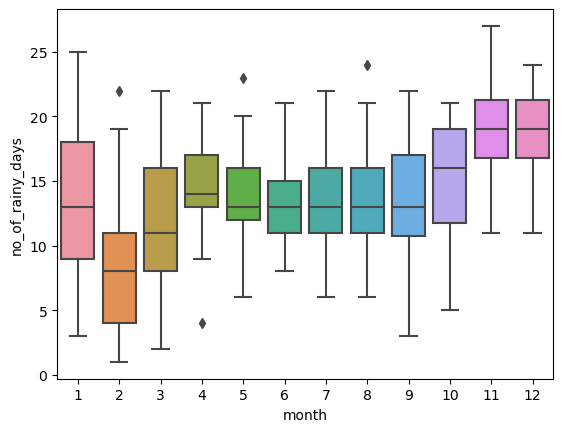

In [137]:
# Plot boxplot to identify outliers
sns.boxplot(y=rainy_days['no_of_rainy_days'], x=rainy_days['month']);

Not many outliers are observed. 

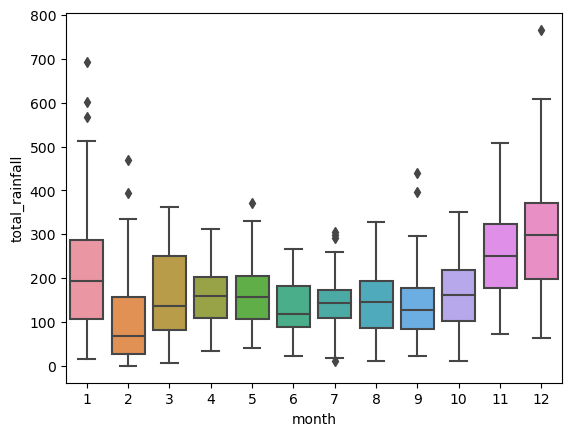

In [138]:
# Plot boxplot to identify outliers
sns.boxplot(y=rainfall['total_rainfall'], x=rainfall['month']);

The Northeast monsoon occurs between Dec and Mar. We observe high variability in the total rainfall as well as a few outliers. 

The Southwest monsoon occurs between Jun and Sep. We observe lower vairability compared to the Northeast monsoon. HOwever, a few outliers are observed. 

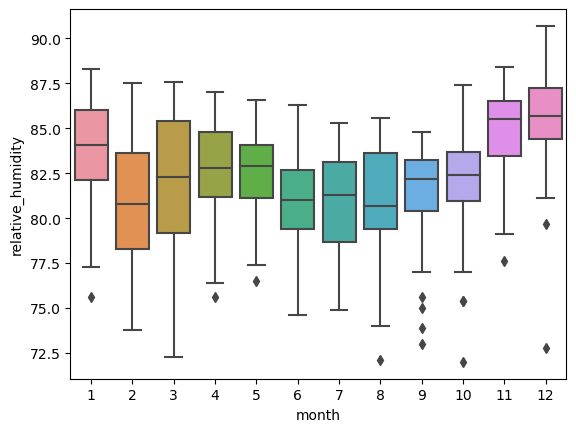

In [139]:
# Plot boxplot to identify outliers
sns.boxplot(y=humidity['relative_humidity'], x=rainfall['month']);

Singapore has a relatively high relative humidity. However, occasionally, outliers in the lower relative humidity range is observed. 

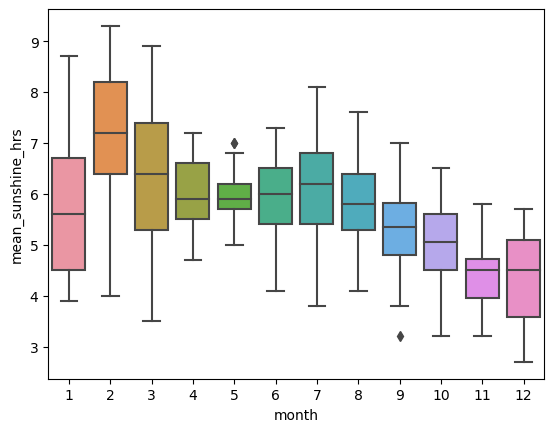

In [140]:
# Plot boxplot to identify outliers
sns.boxplot(y=sunshine['mean_sunshine_hrs'], x=rainfall['month']);

Singapore has a higher amount of sunshine at the beginning of the year and the amount reduced towards the end of the year. There are very few outliers observed. 

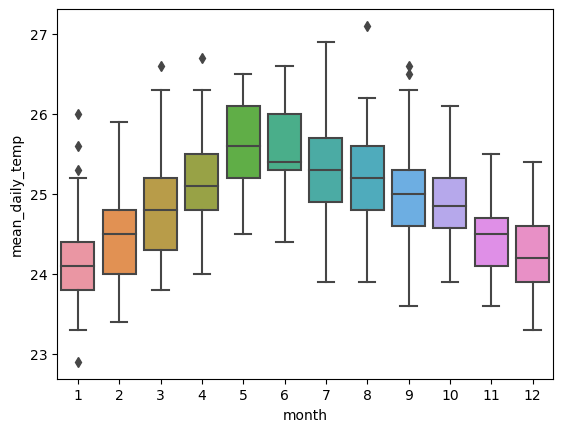

In [141]:
# Plot boxplot to identify outliers
sns.boxplot(y=temperature['mean_daily_temp'], x=rainfall['month']);

The mean temperature goes up in the middle of the year. THere are a few outliers observed as well. 

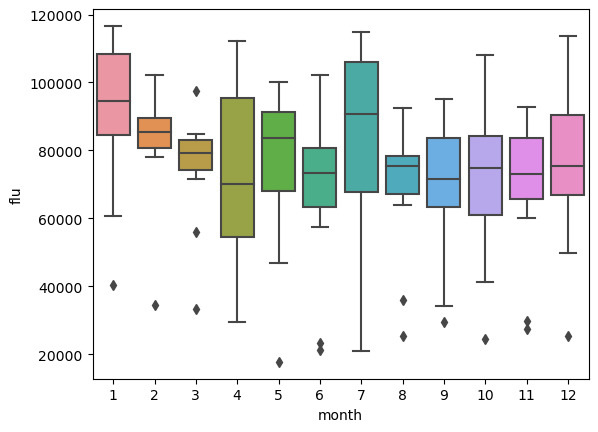

In [142]:
sns.boxplot(y=infections['flu'], x=infections['month']);

Flu cases in Singapore are generally quite consistent at 80k. However, there are a lot of outliers observed at the lower spectrum, going as low as 20k. Would be good to explore the cause (e.g. in 2020, due to lockdowns, the flu cases might have gone down).

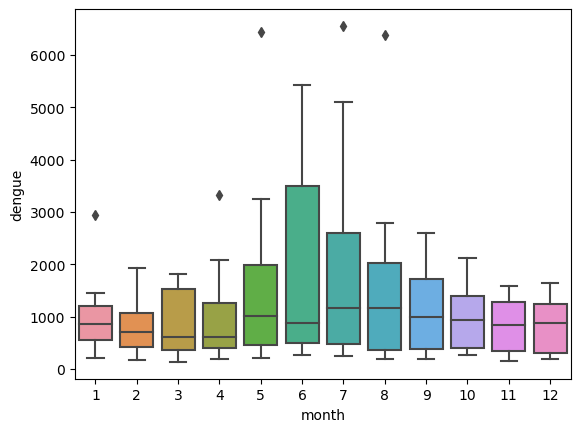

In [143]:
sns.boxplot(y=infections['dengue'], x=infections['month']);

Dengue cases are generally quite low in Singapore. However, there are a few outbreaks observed as outliers. The responsibilible investigative bodies for dengue outbreaks should look into the cause of this.

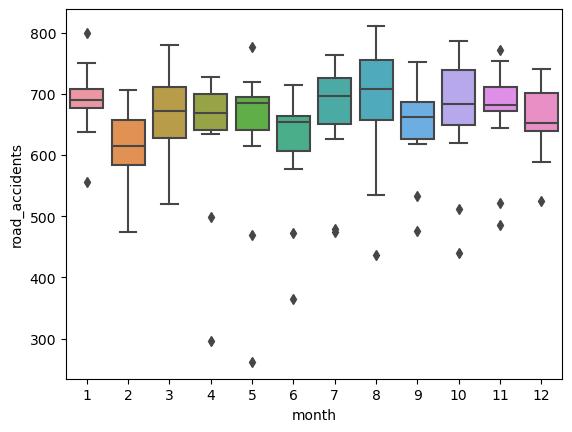

In [144]:
sns.boxplot(y=accidents['road_accidents'], x=accidents['month']);

The number of traffic accidents is quite uniform throughout the years and months. However, many outliers in the lower range are observed. SPF should investigate these periods for the cause of the lower accident rate and try to replicate it. 

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


### 1. Correlation heatmap

In [145]:
# Calculate the correlation between the features in rain_infections
rain_infections.drop(columns=['month', 'year']).corr()

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/2433368800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rain_infections.drop(columns=['month', 'year']).corr()


,dengue,flu,total_rainfall,no_of_rainy_days,relative_humidity,mean_sunshine_hrs,mean_daily_temp
dengue,1.000000,-0.273673,-0.052433,0.019427,-0.179443,-0.027106,0.222454
flu,-0.273673,1.000000,-0.150344,-0.121274,0.179839,0.077422,-0.030406
total_rainfall,-0.052433,-0.150344,1.000000,0.672755,0.578743,-0.632810,-0.526287
no_of_rainy_days,0.019427,-0.121274,0.672755,1.000000,0.640252,-0.727026,-0.400997
relative_humidity,-0.179443,0.179839,0.578743,0.640252,1.000000,-0.563753,-0.583807
mean_sunshine_hrs,-0.027106,0.077422,-0.632810,-0.727026,-0.563753,1.000000,0.368198
mean_daily_temp,0.222454,-0.030406,-0.526287,-0.400997,-0.583807,0.368198,1.000000


/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/2564035399.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_infections = rain_infections.drop(columns=['month', 'year']).corr()


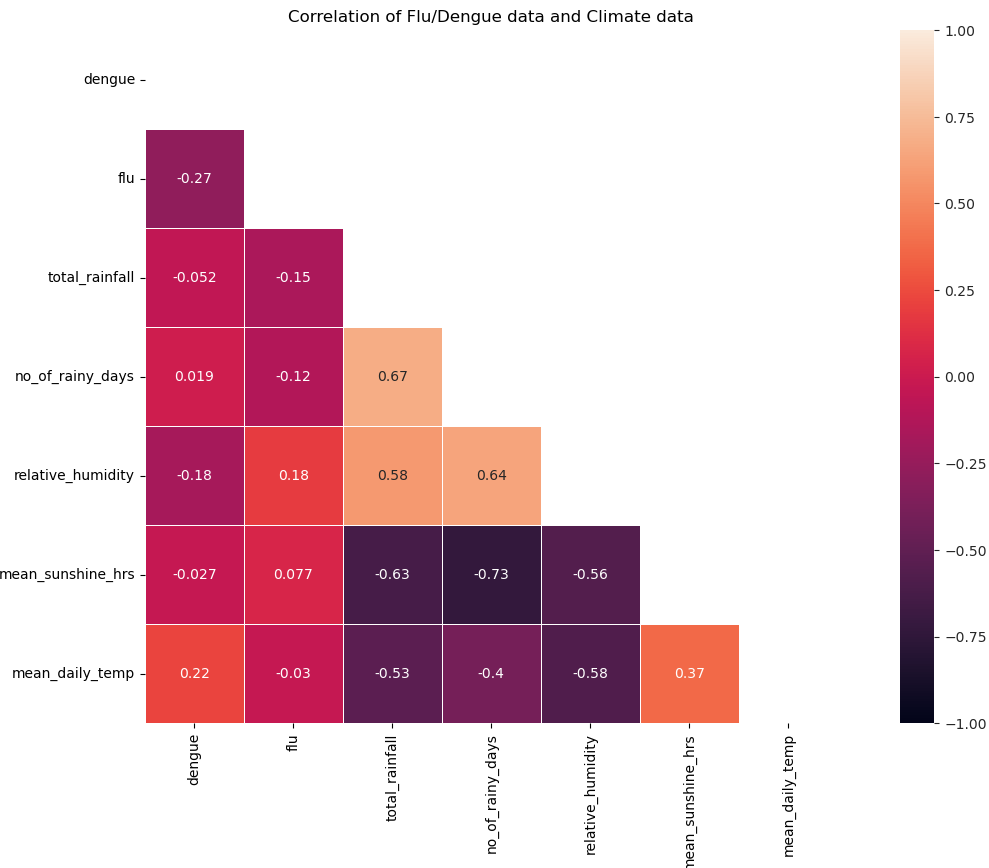

In [146]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Title
plt.title("Correlation of Flu/Dengue data and Climate data")

# Get correlation of variables.
corr_infections = rain_infections.drop(columns=['month', 'year']).corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_infections)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr_infections, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

*Interpretation: The above heatmap shows that there is little correlation between flu/dengue cases to climate data. As the problem statement focuses on total rainfall and number of rainy days, we will not further analyze the other climate data as they do not show any significant correlation.*

In [147]:
# Calculate the correlation between the features in rain_accidents
rain_accidents.drop(columns='month').corr()

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/3515271635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rain_accidents.drop(columns='month').corr()


,road_accidents,total_rainfall,no_of_rainy_days,relative_humidity,mean_sunshine_hrs,mean_daily_temp
road_accidents,1.000000,0.049246,0.100572,0.338546,-0.168099,-0.193528
total_rainfall,0.049246,1.000000,0.676074,0.565333,-0.632086,-0.519039
no_of_rainy_days,0.100572,0.676074,1.000000,0.607430,-0.724892,-0.362134
relative_humidity,0.338546,0.565333,0.607430,1.000000,-0.576014,-0.639411
mean_sunshine_hrs,-0.168099,-0.632086,-0.724892,-0.576014,1.000000,0.413039
mean_daily_temp,-0.193528,-0.519039,-0.362134,-0.639411,0.413039,1.000000


/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_10472/122306560.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_accidents = rain_accidents.drop(columns='month').corr()


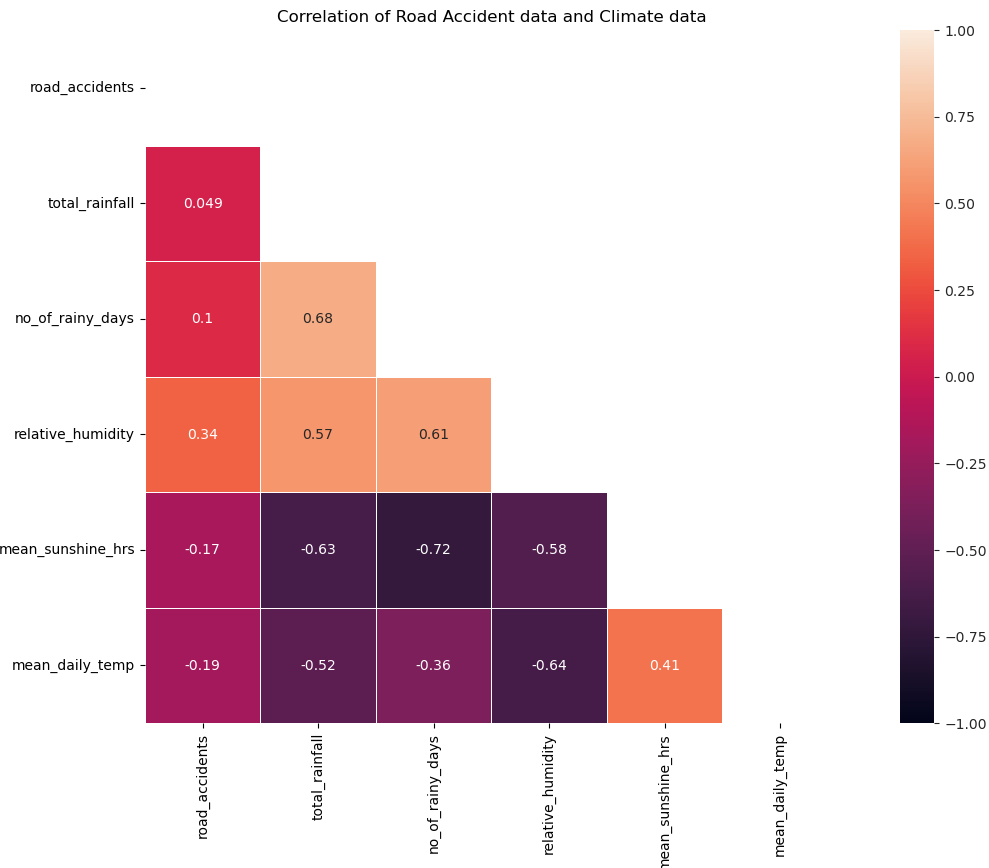

In [148]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Title
plt.title("Correlation of Road Accident data and Climate data")

# Get correlation of variables.
corr_accidents = rain_accidents.drop(columns='month').corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_accidents)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr_accidents, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

*Interpretation: There is little correlation between the number of accidents and the climate data. As the problem statement focuses on total rainfall and number of rainy days, we will not further analyze the other climate data as they do not show any significant correlation.*

### 2. Visualize distributions using histograms

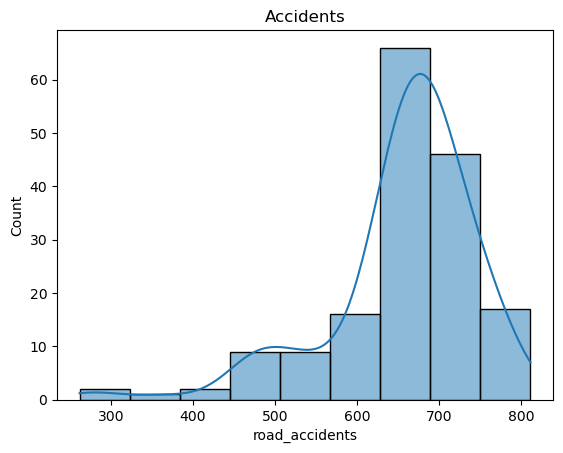

In [149]:
sns.histplot(rain_accidents['road_accidents'], bins=9, kde=True);
plt.title("Accidents");

*Interpretation: The above histogram shows that the accident rate has a left skew. Over 600 accidents a month is the norm. As the norm is to have a high amount of accidents, it might be difficult to see if a rainy month contributes to a higher amount of accidents.*

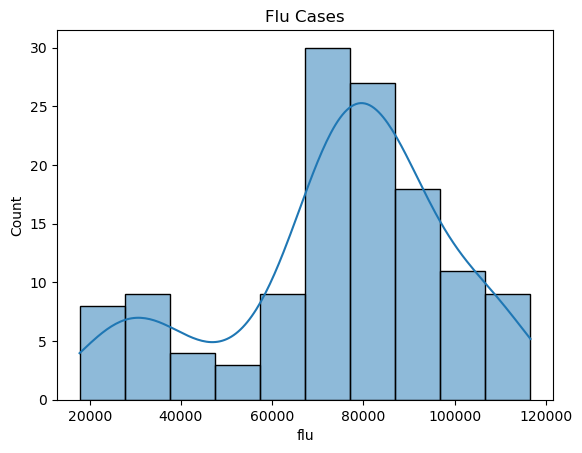

In [150]:
sns.histplot(rain_infections['flu'], bins=10, kde=True);
plt.title("Flu Cases");

*Interpretation: The above histogram shows that the monthly amount of flu cases follows a somewhat normal distribution.*

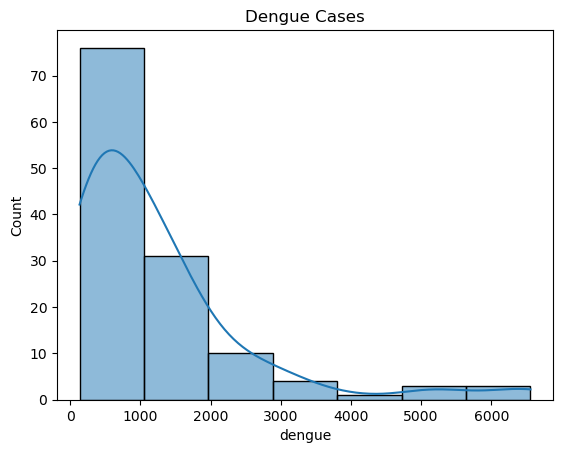

In [151]:
sns.histplot(rain_infections['dengue'], bins=7, kde=True);
plt.title("Dengue Cases");

*Interpretation: The above histogram shows that the dengue cases per month have a right skew, which means the monthly figure generally trends towards the lower amount.*

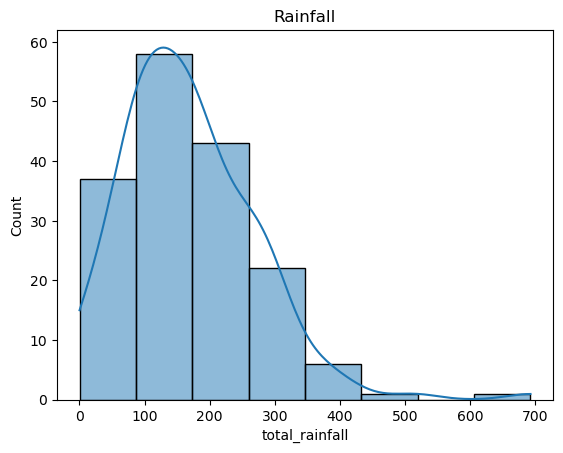

In [152]:
sns.histplot(rain_accidents['total_rainfall'], bins=8, kde=True);
plt.title("Rainfall");

*Interpretation: The above histogram shows that the total per month have a right skew, which means the monthly figure generally trends towards the lower amount.*

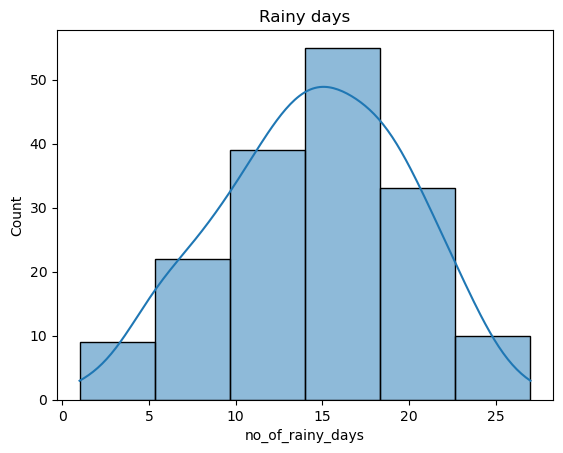

In [153]:
sns.histplot(rain_accidents['no_of_rainy_days'], bins=6, kde=True);
plt.title("Rainy days");

*Interpretation: The above histogram shows that the number of rainy days per month normal distribution.*

### 3. Plot and interpret boxplots

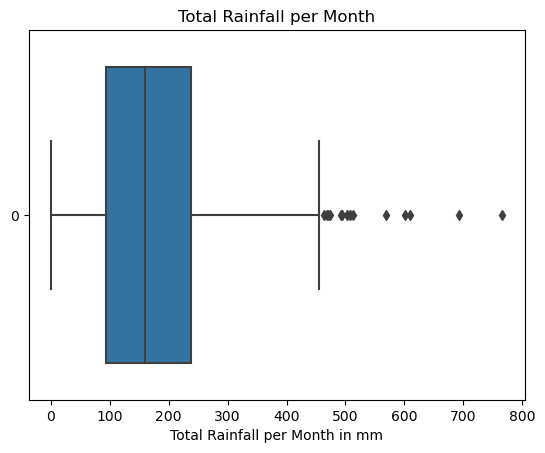

In [154]:
sns.boxplot(rainfall['total_rainfall'], orient = 'h');
plt.title("Total Rainfall per Month");
plt.xlabel("Total Rainfall per Month in mm");

*Interpretation: The boxplot above shows that there are outliers with over 450mm*

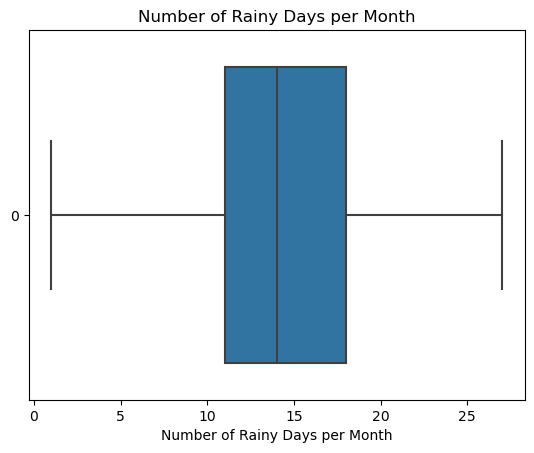

In [155]:
sns.boxplot(rainy_days['no_of_rainy_days'], orient = 'h')
plt.title("Number of Rainy Days per Month");
plt.xlabel("Number of Rainy Days per Month");

*Interpretation: The boxplot above shows that there are no outliers*

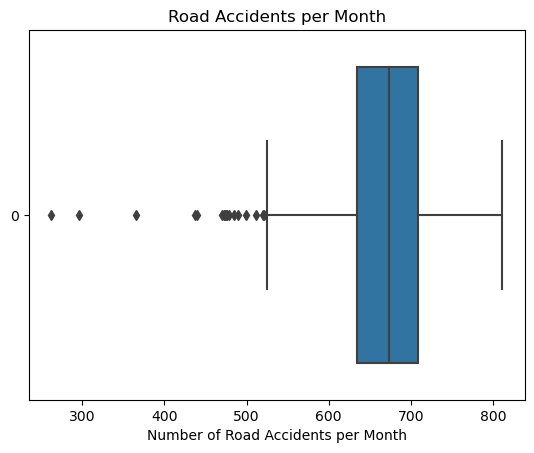

In [156]:
sns.boxplot(rain_accidents['road_accidents'], orient = 'h')
plt.title("Road Accidents per Month");
plt.xlabel("Number of Road Accidents per Month");

*Interpretation: The boxplot above shows that there are outliers below 510 accidents a month. This also shows that it is normal to have approx. 650 accidents a month*

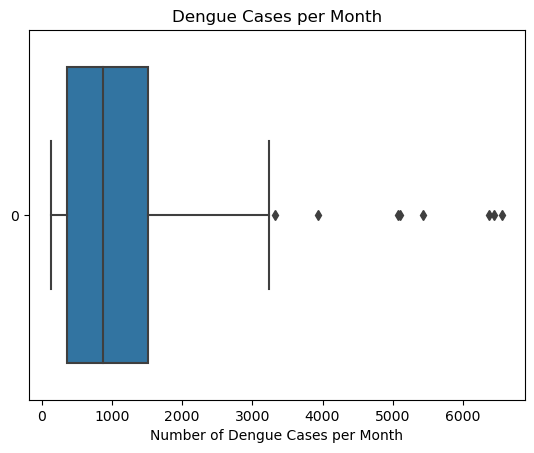

In [157]:
sns.boxplot(rain_infections['dengue'], orient = 'h')
plt.title("Dengue Cases per Month");
plt.xlabel("Number of Dengue Cases per Month");

*Interpretation: The boxplot above shows that there are outliers above 3100 cases a month. This also shows that it is normal to have approx. 1000 cases a month*

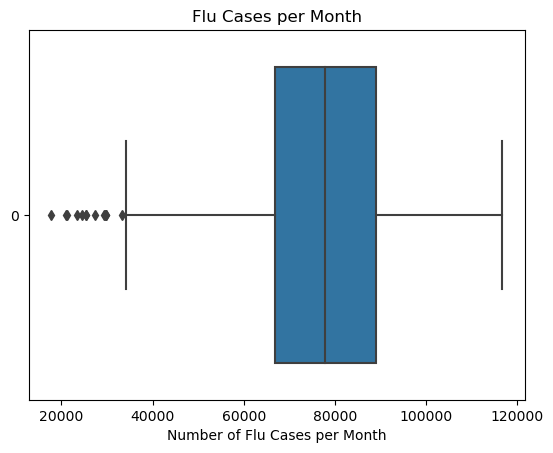

In [158]:
sns.boxplot(rain_infections['flu'], orient = 'h')
plt.title("Flu Cases per Month");
plt.xlabel("Number of Flu Cases per Month");

*Interpretation: The boxplot above shows that there are outliers both under 40000 cases and above 120000 cases a month. This also shows that it is normal to have approx. 800000 cases a month*

### 4. Plotting and interpreting Scatter Plots

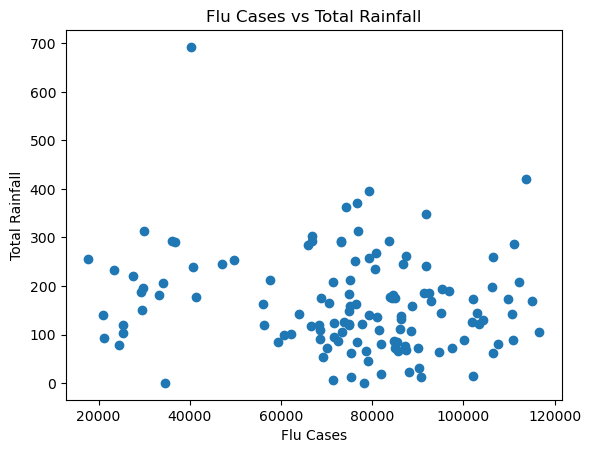

In [159]:
plt.scatter(rain_infections['flu'], rain_infections['total_rainfall'])

plt.title("Flu Cases vs Total Rainfall")
plt.ylabel("Total Rainfall", fontsize = 10)
plt.xlabel("Flu Cases", fontsize = 10);

*Interpretation: The number of flu cases does not seem to be affected by the total rainfall. Regardless of the total rainfall, the monthly flu cases seems to be approx 80k per month*

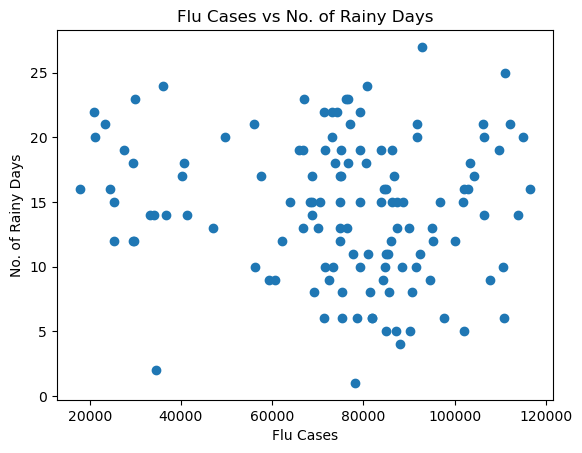

In [160]:
plt.scatter(rain_infections['flu'], rain_infections['no_of_rainy_days'])

plt.title("Flu Cases vs No. of Rainy Days")
plt.ylabel("No. of Rainy Days", fontsize = 10)
plt.xlabel("Flu Cases", fontsize = 10);

*Interpretation: The number of flu cases does not seem to be affected by the number of rainy days. Regardless of the number of rainy days, the monthly flu cases seems to be approx 80k per month*

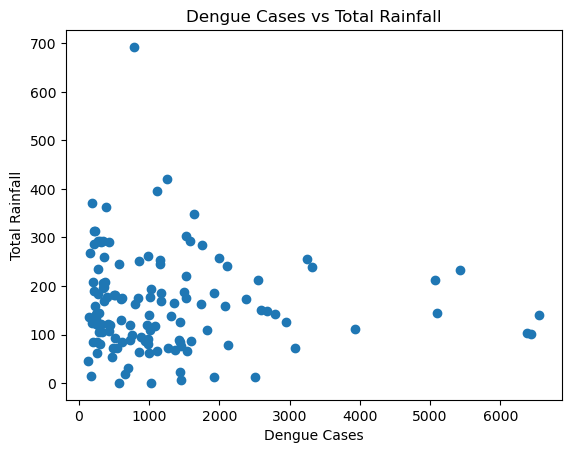

In [161]:
plt.scatter(rain_infections['dengue'], rain_infections['total_rainfall'])

plt.title("Dengue Cases vs Total Rainfall")
plt.ylabel("Total Rainfall", fontsize = 10)
plt.xlabel("Dengue Cases", fontsize = 10);

*Interpretation: The number of dengue cases does not seem to be affected by the total rainfall. Regardless of the total rainfall, the monthly dengue cases seems to be approx 500 to 1000 per month*

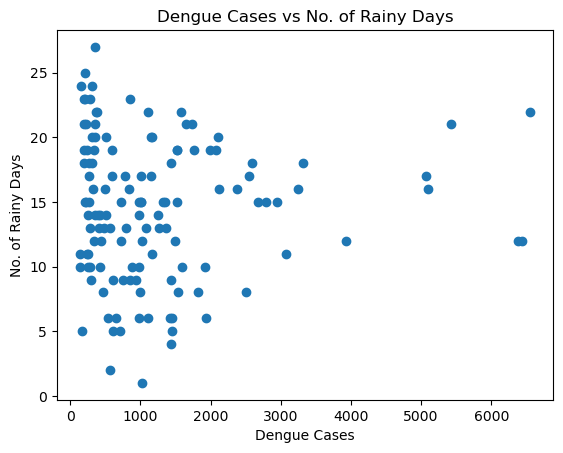

In [162]:
plt.scatter(rain_infections['dengue'], rain_infections['no_of_rainy_days'])

plt.title("Dengue Cases vs No. of Rainy Days")
plt.ylabel("No. of Rainy Days", fontsize = 10)
plt.xlabel("Dengue Cases", fontsize = 10);

*Interpretation: The number of dengue cases does not seem to be affected by the number of rainy days. Regardless of the number of rainy days, the monthly dengue cases seems to be approx 500 to 1000 per month*

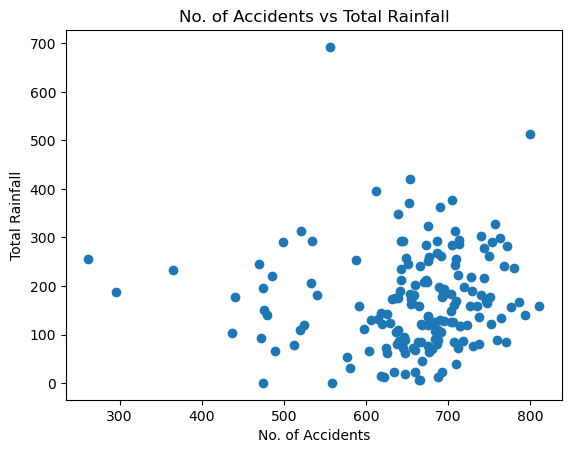

In [163]:
plt.scatter(rain_accidents['road_accidents'], rain_accidents['total_rainfall'])

plt.title("No. of Accidents vs Total Rainfall")
plt.ylabel("Total Rainfall", fontsize = 10)
plt.xlabel("No. of Accidents", fontsize = 10);

*Interpretation: The number of road accidents does not seem to be affected by the total rainfall. Regardless of the total rainfall, the monthly accident cases seems to be approx 600 to 700 per month*

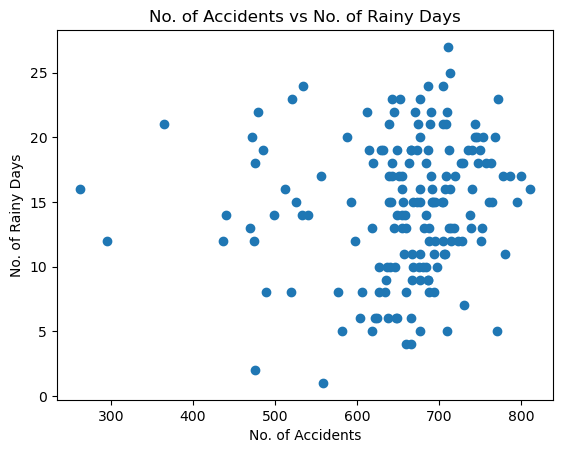

In [164]:
plt.scatter(rain_accidents['road_accidents'], rain_accidents['no_of_rainy_days'])

plt.title("No. of Accidents vs No. of Rainy Days")
plt.ylabel("No. of Rainy Days", fontsize = 10)
plt.xlabel("No. of Accidents", fontsize = 10);

*Interpretation: The number of road accidents does not seem to be affected by the number of rainy 
days. Regardless of the total rainfall, the monthly accident cases seems to be approx 600 to 700 per month*

### 5. Box plots of monthly data to see monthly trends

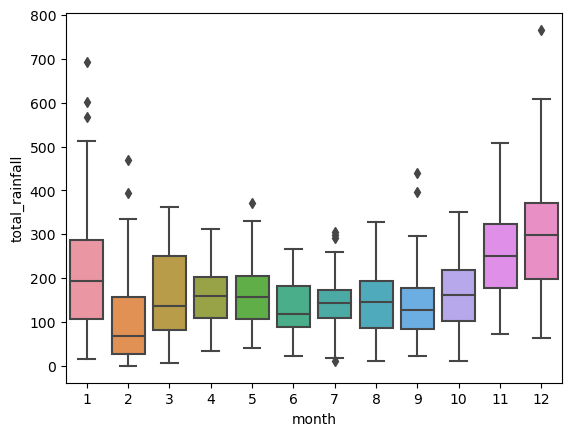

In [165]:
# Plotted the total rainfall data to compare with flu/dengue/accident cases to spot for trends
sns.boxplot(y=rainfall['total_rainfall'], x=rainfall['month']);

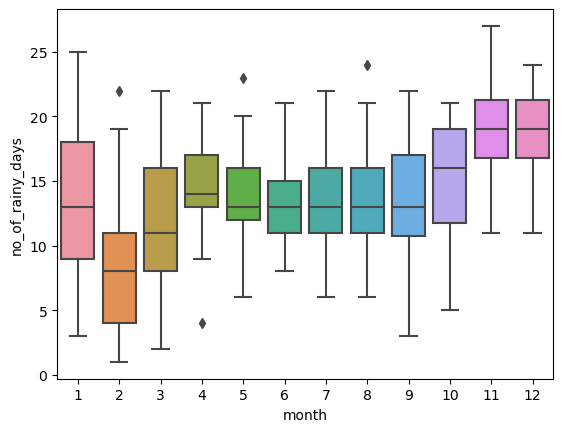

In [166]:
# Plotted the number of rainy day data to compare with flu/dengue/accident cases to spot for trends
sns.boxplot(y=rainy_days['no_of_rainy_days'], x=rainy_days['month']);

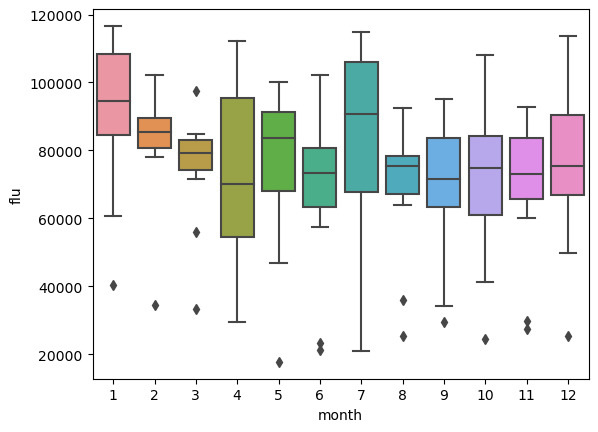

In [167]:
sns.boxplot(y=infections['flu'], x=infections['month']);

*Interpretation: January and July seem to have a higher number of flu cases every year compared to the other months. No similar trend observed with total rainfall and number of rainy days, hence no link is observed.*

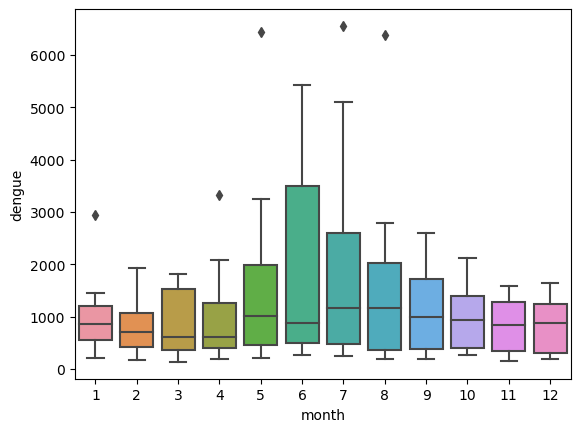

In [168]:
sns.boxplot(y=infections['dengue'], x=infections['month']);

*Interpretation: While the number of dengue cases seems to be rather flat, a lot of variance is observed during June and July. No similar trend is observed with total rainfall and number of rainy days, hence no link is observed.*

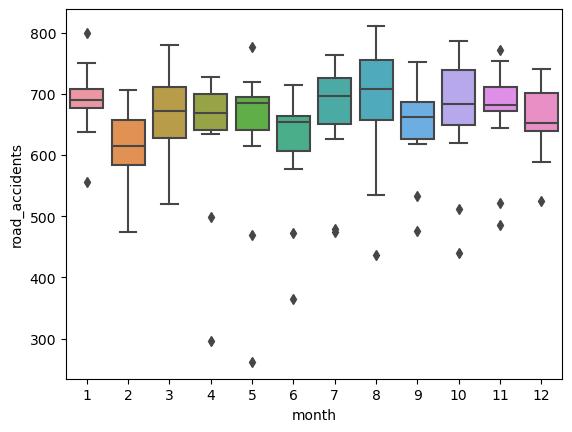

In [169]:
sns.boxplot(y=accidents['road_accidents'], x=accidents['month']);

*Interpretation: The number of road accidents per month is rather flat throughout the year. However, there is a slight decline during Feburary. There is a similar dip in total rainfall and number of rainy days in February, hence some link could be observed here.*

### 6. Linear Regression to spot long term trend

<AxesSubplot: xlabel='year', ylabel='flu'>

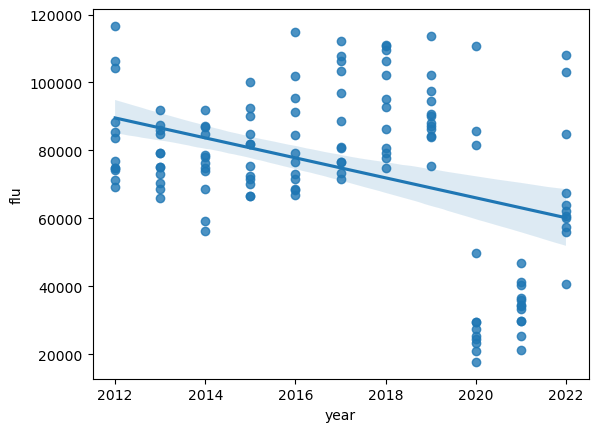

In [170]:
# Regression plot of flu cases
sns.regplot(data=infections, x='year', y='flu')

<AxesSubplot: xlabel='year', ylabel='dengue'>

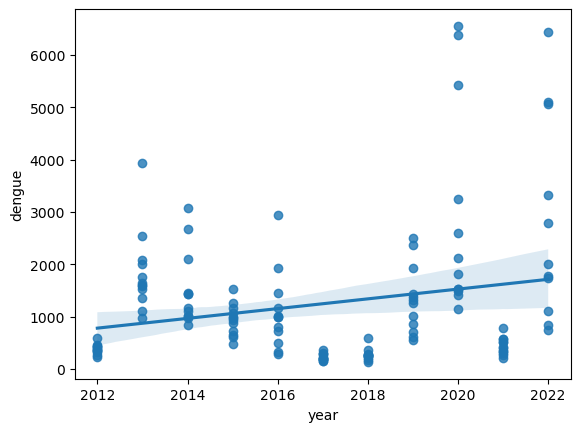

In [171]:
# Regression plot of dengue cases
sns.regplot(data=infections, x='year', y='dengue')

<AxesSubplot: xlabel='year', ylabel='road_accidents'>

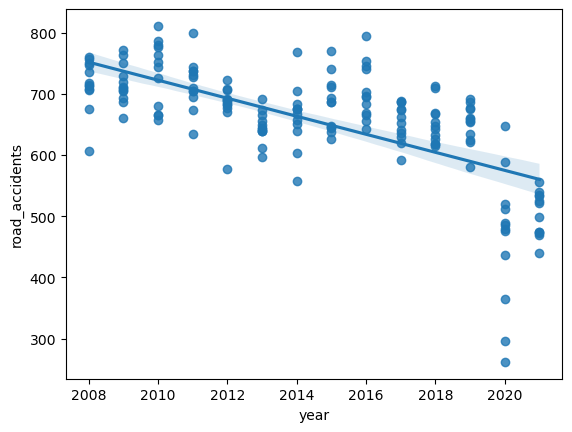

In [172]:
# Regression plat of road accidents
accidents['year'] = accidents['date'].dt.year
sns.regplot(data=accidents, x='year', y='road_accidents')


## Conclusions and Recommendations

**Overall Analysis**

Based on the exploratory data analysis performed, no strong link can be found between climate data (specifically total rainfall per month and number of rainy days per month) to the number of flu cases, dengue cases and accident cases per month. As such, there is no evidence of a need to stock up on resources such as medication, vaccination and hospital staff during the rainy season. Similarly, no evidence is found that running advertising campaigns before and during the rainy season would affect the number of flu, dengue and accident cases. 

**Analysis of Flu Cases**

* No observable link is found between the monthly total rainfall and monthly number of rainy days to flu cases. 
* However, there is usually a spike in flu cases in January and July compared to other months, hence further investigation looking at other possible factors is warranted. 
* Looking at the long term trend, the number of flu cases has been decreasing. However, with a closer look, the flu cases were actually rather flat, but significantly dropped in 2020 and 2021. This could be attributed to lock downs and mask wearing due to covid-19.

**Analysis of Dengue Cases**

* No observable link is found between the monthly total rainfall and monthly number of rainy days to dengue cases. 
* A lot of variance is observed during June and July, meaning that there are quite a few years with spikes in dengue cases during these months. Further investigation is recommneded to identify the cause. 
* The long term trend shows that the number of dengue cases has been increasing. Hence, more investigation into the cause is advised. 

**Analysis of Road Accident Cases**

* The only observable link is found between the monthly total rainfall and monthly number of rainy days to road accident cases is that there is a decrease in all three attributes during Febuary. However, on the months with higher rainfall and rainy days (e.g. December and January), there is no increase in the number of road accidents. Hence, we cannot conclude that total rainfall and more rainy days affects the number of road accidents. 
* The number of road accidents has been on a declining trend. Hence, more investigation into other factors causing this is advised. 
